# Tecnicatura Superior en Ciencia de Datos e Inteligencia Artificial
# Práctica Profesionalizante I

Equipo **Data Voyagers**:

- PERALTA, María Laura
- LEDEZMA, Mariano
- BADIN, María Paula


# Análisis de la Cadena de Suministro

# Modelado Predictivo

Las empresas que gestionan cadenas de suministro enfrentan desafíos continuos relacionados con la previsión de la demanda, la gestión de inventarios y la optimización de rutas de transporte. Estos problemas pueden derivar en costos operativos elevados, demoras en la entrega y una disminución en la satisfacción del cliente. DataVista Analytics, consciente de estos desafíos, ha diseñado una solución basada en ciencia de datos y machine learning para abordar estos problemas de manera eficiente y proactiva.

El presente informe describe la implementación de un modelo predictivo que permite mejorar la gestión de la cadena de suministro. A través de técnicas avanzadas de análisis de datos y algoritmos de machine learning, este proyecto busca optimizar las operaciones logísticas, mejorar la toma de decisiones y, en última instancia, reducir los costos operativos mientras se incrementa la satisfacción del cliente.

In [900]:
# Librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [901]:
# Importación de dataset desde GitHub con especificación de codificación
url = 'https://raw.githubusercontent.com/ISPC-PP1-2024/proyecto/main/datos/DataCoSupplyChainDataset/DataCoSupplyChainDataset.csv'
df_1 = pd.read_csv(url, encoding='latin1')

# Ver los primeros registros
df_1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [902]:
# Se consulta la base de datos
#df_1=pd.read_csv('C:\\Users\\Usuario\\Desktop\\2024\\materias\\CDIA\\2semestre\\pp1-cdia23\\ejemplo suply chain\\DataCoSupplyChainDataset.csv\\para jupyter\\DataCoSupplyChainDataset.csv', encoding='latin1', sep=',',  low_memory=False)

In [903]:
# filtramos el set de datos original por país para abarcar solo argentina, brasil y mexico
df = df_1[df_1['Order Country'].isin(['Argentina', 'Brasil', 'Mexico'])]

In [904]:
df_1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [905]:
# verificamos si existen filas duplicadas
duplicados=df[df.duplicated()]
if duplicados.empty:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print("Las siguientes filas están duplicadas:")
    print(duplicados)

No hay filas duplicadas en el DataFrame.


In [906]:
# verificamos si tenemos valores vacíos
hay_vacios = df.isna().any().any()

if hay_vacios:
    print("El DataFrame contiene valores vacíos.")
else:
    print("El DataFrame no contiene valores vacíos.")

El DataFrame contiene valores vacíos.


In [907]:
#Buscamos valores negativos en las columnas y mostramos si alguna los tiene
def check_negative_values(df_1, columns):
    results = {}
    for col in columns:
        if col not in df_1.columns:
            results[col] = f"La columna '{col}' no existe en el DataFrame"
            continue
        
        # Convertir la columna a numérica, coerciendo errores a NaN
        numeric_col = pd.to_numeric(df_1[col], errors='coerce')
        
        # Contar valores negativos, excluyendo NaN
        negative_count = (numeric_col < 0).sum()
        nan_count = numeric_col.isna().sum()
        
        if negative_count > 0:
            results[col] = f"Se encontraron {negative_count} valores negativos en '{col}'"
        else:
            results[col] = f"No se encontraron valores negativos en '{col}'"
        
        if nan_count > 0:
            results[col] += f". Además, hay {nan_count} valores no numéricos o nulos"

    return results

columns_to_check = ['Order Item Quantity', 'Sales', 'Order Item Total', 'Product Price']
results = check_negative_values(df_1, columns_to_check)

# Resultados
for col, result in results.items():
    print(result)

# Información adicional sobre tipos de datos
print("\nTipos de datos de las columnas:")
for col in columns_to_check:
    if col in df_1.columns:
        print(f"{col}: {df_1[col].dtype}")
    else:
        print(f"{col}: Columna no encontrada")   

No se encontraron valores negativos en 'Order Item Quantity'
No se encontraron valores negativos en 'Sales'
No se encontraron valores negativos en 'Order Item Total'
No se encontraron valores negativos en 'Product Price'

Tipos de datos de las columnas:
Order Item Quantity: int64
Sales: float64
Order Item Total: float64
Product Price: float64


In [908]:
# quitar columnas vacias 
df = df.drop(['Product Description', 'Order Zipcode', 'Product Status'], axis=1)

In [909]:
#ELIMINAMOS COLUMNAS DEL DATAFRAME QUE NO USAMOS.
columnas_a_eliminar = ['Sales per customer','Category Id','Customer City','Customer Email','Customer Fname','Customer Lname',
'Customer Password','Customer State','Customer Street','Customer Zipcode','Department Id','Department Name','Latitude',
'Longitude','Market','Order City','Order Customer Id','Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate',
'Order Item Profit Ratio','Product Image']

df = df.drop(columns=columnas_a_eliminar)

In [910]:
# Traducimos las columnas para facilitar el manejo y sacar los espacios
df_espanol=df
df_espanol.rename(columns={'Category Name':'Categoria',
                           'Type':'Pago'
                           ,'Days for shipping (real)':'DiasEnvio(Real)'
                           , 'Days for shipment (scheduled)':'DiasEnvio(Programado)'
                           , 'Benefit per order':'BeneficioPorPedido'
                           , 'Delivery Status':'EstadoEntrega'
                           , 'Late_delivery_risk':'RiesgoEntregaTardia'
                           , 'Category Name':'Categoria'
                           , 'Customer Country':'PaisCliente'
                           , 'Customer Id':'IDCliente'
                           , 'Customer Segment':'SegmentoCliente'
                           , 'Order Country':'PaisPedido'
                           , 'order date (DateOrders)':'FechaPedido'
                           , 'Order Id':'IDPedido'
                           , 'Order Item Id':'IDArticuloPedido'
                           , 'Order Item Product Price':'PrecioArticuloPedido'
                           , 'Order Item Quantity':'CantidadArticulosPedido'
                           , 'Sales':'Ventas'
                           , 'Order Item Total':'TotalArticulosPedido'
                           , 'Order Profit Per Order':'GananciaPorPedido'
                           , 'Order Region':'RegionPedido'
                           , 'Order State':'DestinoPedido'
                           , 'Order Status':'EstadoPedido'
                           , 'Product Card Id':'IDProducto'
                           , 'Product Category Id':'CategoriaProducto'
                           , 'Product Name':'NombreProducto'
                           , 'Product Price':'PrecioProducto'
                           , 'shipping date (DateOrders)':'FechaEnvio'
                           , 'Shipping Mode':'ModoEnvio'                                
                          
                          },inplace=True)

In [911]:
#utilizar cada uno de estos dataframes para cada ejemplo, para evitar variaciones en el desarrollo
df_lineal=df_logistica=df_arbol=df_cluster=df_espanol

# Comenzamos con la regresión lineal simple

In [914]:
# Veamos solo las columnas numéricas del DataFrame para analizar cuáles trabajaremos
columnas_numericas = df_lineal.select_dtypes(include=['number'])
columnas_numericas.columns

Index(['DiasEnvio(Real)', 'DiasEnvio(Programado)', 'BeneficioPorPedido',
       'RiesgoEntregaTardia', 'IDCliente', 'IDPedido', 'IDArticuloPedido',
       'PrecioArticuloPedido', 'CantidadArticulosPedido', 'Ventas',
       'TotalArticulosPedido', 'GananciaPorPedido', 'IDProducto',
       'CategoriaProducto', 'PrecioProducto'],
      dtype='object')

## Vamos a realizar la regresión lineal entre:
## Ventas y Ganancia Por Pedido

In [916]:
df_lineal[['Ventas','GananciaPorPedido']].head()

,Ventas,GananciaPorPedido
84,150.000000,23.469999
91,119.970001,32.860001
93,199.949997,55.090000
94,199.949997,68.589996
95,250.000000,51.980000


In [917]:
#Trabajamos los valores de las columnas
import re

# Creamos una función para limpiar los datos
def clean(benPP_str):
    if pd.isna(benPP_str):
        return None
    
    # Convertir a string si no lo es
    benPP_str = str(benPP_str)
    
    # Eliminar espacios en blanco y caracteres no numéricos excepto punto y coma
    cleaned = re.sub(r'[^\d.,]', '', benPP_str)
    
    # Reemplazar coma por punto si hay más de un punto (asumiendo que la coma es el separador decimal)
    if cleaned.count('.') > 1 and ',' in cleaned:
        cleaned = cleaned.replace(',', '.')
    
    # Si hay más de un punto, asumimos que todos menos el último son separadores de miles
    parts = cleaned.split('.')
    if len(parts) > 2:
        integer_part = ''.join(parts[:-1])
        decimal_part = parts[-1]
        cleaned = f"{integer_part}.{decimal_part}"
    
    try:
        return float(cleaned)
    except ValueError:
        print(f"No se pudo convertir: {benPP_str}")
        return None

# Aplicamos la función a la columna Ventas
df_lineal['Ventas'] = df_lineal['Ventas'].apply(clean)

# Aplicamos la función a la columna Ganancia por Pedido
df_lineal['GananciaPorPedido'] = df_lineal['GananciaPorPedido'].apply(clean)

## Graficamos la relación

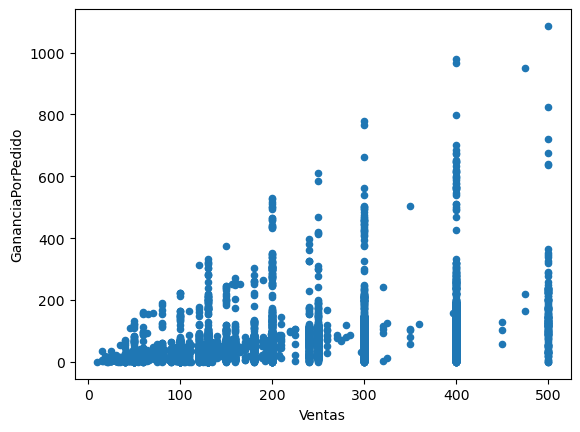

In [919]:
df_lineal.plot.scatter(x='Ventas', y='GananciaPorPedido')
plt.show()

# Recta lineal
La ecuación de la recta lineal es: y=wx+b donde w:pendiente y b:intercepto

# Agreguemos una recta sobre nuestra gráfica

In [921]:
#Establecemos los valores de los parámetros de la recta:
w=1
b=0

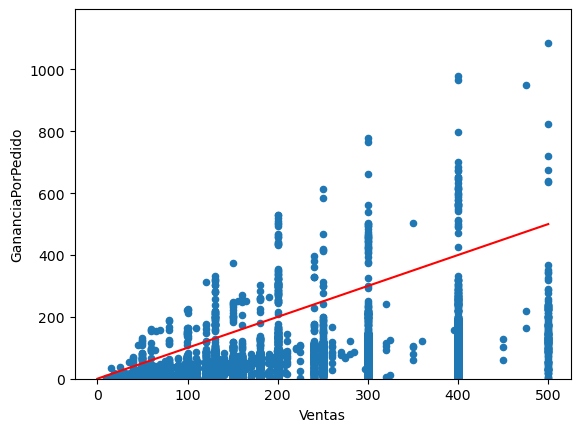

In [922]:
x = np.linspace(0, df_lineal['Ventas'].max(), 100) #establecemos el rango de valores de la variable x
y = w*x+b

#gráficamos:
df_lineal.plot.scatter(x='Ventas', y='GananciaPorPedido')
plt.plot(x,y,'-r')
plt.ylim(0,df_lineal['GananciaPorPedido'].max()*1.1)
plt.show()

# Podemos cambiar los valores de w y b para "jugar" con la recta, y ajustarla para obtener el menor error posible

Queremos obtener el mejor modelo, es decir el que presente menor error.
Para ello debemos calcular a cada modelo el error de predición y obtener el error cuadrático medio para luego compararlo con los demás modelos.

# Cálculo del Error de predicción
Nota: El error de predicción se obtiene de calcular la diferencia entre la predicción y el valor real, dicha diferencia puede ser un número negativo, por lo que tomaremos los cuadrados de dichas diferencias a fin de poder realizar comparaciones correctamente.

In [924]:
df_lineal['Predicciones'] = df_lineal['Ventas']*w+b #calculamos las predicciones

In [925]:
df_lineal['Diferencias'] = df_lineal['Predicciones']- df_lineal['GananciaPorPedido'] #Calculamos las diferencias
df_lineal['Cuadrados'] = df_lineal['Diferencias']**2 #Obtenemos los cuandrados

In [926]:
df_lineal.head()

,Pago,DiasEnvio(Real),DiasEnvio(Programado),BeneficioPorPedido,EstadoEntrega,RiesgoEntregaTardia,Categoria,PaisCliente,IDCliente,SegmentoCliente,...,EstadoPedido,IDProducto,CategoriaProducto,NombreProducto,PrecioProducto,FechaEnvio,ModoEnvio,Predicciones,Diferencias,Cuadrados
84,PAYMENT,4,2,23.469999,Late delivery,1,Women's Apparel,Puerto Rico,8541,Home Office,...,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,4/15/2017 15:49,Second Class,150.000000,126.530001,16009.841075
91,PAYMENT,4,2,32.860001,Late delivery,1,Shop By Sport,Puerto Rico,9272,Home Office,...,PENDING_PAYMENT,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,1/22/2017 19:37,Second Class,119.970001,87.110001,7588.152203
93,TRANSFER,6,4,55.090000,Late delivery,1,Shop By Sport,Puerto Rico,6398,Consumer,...,PENDING,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,2/13/2017 9:47,Standard Class,199.949997,144.859997,20984.418658
94,TRANSFER,4,4,68.589996,Shipping on time,0,Shop By Sport,Puerto Rico,4209,Consumer,...,PENDING,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,4/7/2015 19:08,Standard Class,199.949997,131.360001,17255.449747
95,TRANSFER,2,4,51.980000,Advance shipping,0,Women's Apparel,Puerto Rico,8917,Consumer,...,PENDING,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,4/15/2017 14:25,Standard Class,250.000000,198.020000,39211.920582


In [927]:
df_lineal['Cuadrados'].mean() #Calculamos el promedio o error cuadrático medio

28505.89064694621

Luego de realizar pruebas con diferentes valores de w (entre 0 y 2.5) y comparar los valores del ecm obtenido, podemos optimizar w calculando el mínimo promedio. Para ello realizamos una función cuadrática entre w y ecm y calculamos el vérticie de la parábola (o valor mínimo)

In [929]:
#grid del error:
w = np.linspace(0, 1, num=40) #trabajaremos con 20 valores diferentes dentro del rango
grid_error = pd.DataFrame(w, columns=['w'])
grid_error.head()

,w
0,0.000000
1,0.025641
2,0.051282
3,0.076923
4,0.102564


In [930]:
#Obtenemos los errores para cada valor:
def sum_error(w, df_espanol):
    b=0
    df_lineal['Predicciones'] = df_lineal['Ventas']*w+b
    df_lineal['Diferencias'] = df_lineal['Predicciones']-df_lineal['GananciaPorPedido']
    df_lineal['Cuadrados'] = df_lineal['Diferencias']**2
    return(df_lineal['Cuadrados'].mean())

In [931]:
#Agregamos los errores al nuevo df
grid_error['ecm']=grid_error['w'].apply(lambda x: sum_error(x, df_espanol=df_espanol))
grid_error.head()

,w,ecm
0,0.000000,9400.426271
1,0.025641,8591.726272
2,0.051282,7851.372784
3,0.076923,7179.365806
4,0.102564,6575.705339


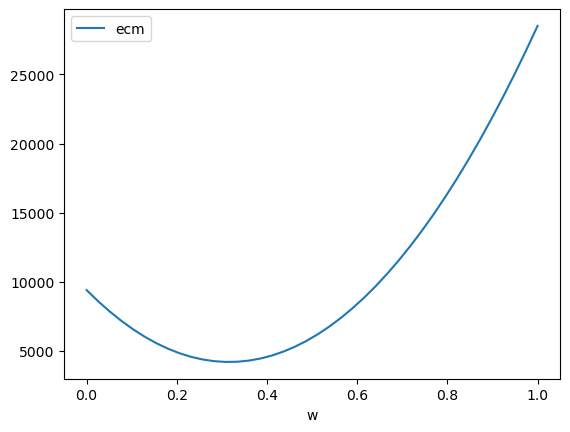

In [932]:
#graficamos:
grid_error.plot(x='w',y='ecm')
plt.show()

In [933]:
#obtenemos el menor w:
w = grid_error['w'].values
ecm = grid_error['ecm'].values
coeficientes = np.polyfit(w, ecm, 2) #armamos la ecuación de la función y obtenemos los coeficientes
a = coeficientes[0]
b = coeficientes[1]
c = coeficientes[2]

# calculamos el vértice y mostramos el valor de w
x_vertice = -b / (2 * a)
y_vertice = a * x_vertice**2 + b * x_vertice + c

print("El valor mínimo de w es:", (x_vertice))

El valor mínimo de w es: 0.31621416430592464


In [934]:
# Por lo que el mejor modelo es el que tiene como valores w=0.316 y b=0

In [ ]:
## También podemos hacer el análisis con sklear:

In [935]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output
X_train = np.array(df_lineal['Ventas']).reshape((-1, 1))
Y_train = np.array(df_lineal['GananciaPorPedido'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [0.31621416]


# Regresión Lineal Simple - Ventas y Ganancias por Pedido
## Conceptos Básicos:
* Regresión Lineal Simple: Este método estadístico permite modelar la relación entre una variable independiente (predictora) y una variable dependiente (respuesta).

El objetivo principal de este análisis es predecir las ganancias por pedido en función de las ventas realizadas, considerando las ventas como variable independiente y las ganancias como variable dependiente.

* Ecuación de la Regresión: La ecuación básica de la regresión lineal simple se expresa como:
          Y = b + wXY = b + wXY = b+wX
  donde:
        * Y es la variable dependiente (ganancias).
        * X es la variable independiente (ventas).
        * b representa la intersección de la línea con el eje Y.
        * w es la pendiente de la línea de regresión.

## Procedimiento:
* Recopilación de Datos:
    * Filtramos los datos de ventas y ganancias para establecer su relación.
    * Eliminamos valores vacíos o ceros.
    * Estructuramos las columnas para facilitar la visualización.

* Exploración de Datos:
    * Visualizamos los datos mediante un gráfico de dispersión, lo que nos permite observar la relación entre ventas y ganancias y evaluar si la regresión lineal es apropiada.

* Ajuste del Modelo:
    * Utilizamos la recta de regresión para establecer la linealidad deseada.
    * A través de diferentes pruebas, calculamos los coeficientes w y b que optimizan el modelo.
    * Aunque es posible usar librerías de Python para automatizar estos cálculos, en este ejemplo optamos por realizarlo manualmente para entender cada paso del proceso.

* Evaluación del Modelo:
    * Analizamos los errores de predicción y calculamos el error cuadrático medio.
    * Comparamos estos errores para obtener la función cuadrática que minimiza el valor de error.
    * Además, utilizamos una librería de Python para confirmar que los resultados obtenidos mediante ambos métodos coincidían.

* Interpretación:
    * Un valor positivo para w indica que, a medida que las ventas aumentan, las ganancias también tienden a incrementarse.
    * Esto permite hacer predicciones sobre las ganancias con base en nuevas cifras de ventas.

* Validación:
    * Se sugiere utilizar un conjunto de datos diferente para validar el modelo y asegurar que generaliza correctamente.

## Conclusión:
El modelo final de regresión lineal simple demostró ser efectivo en la predicción de ganancias por pedido a partir de las ventas. Esto confirma la validez de la metodología empleada y sugiere su implementación en futuros análisis de datos similares.

# Árbol de decisión
Un árbol de decisión es un modelo de aprendizaje automático que toma decisiones basadas en una serie de preguntas (nodos) para clasificar o predecir datos. Cada pregunta divide los datos en ramas, lo que lleva a decisiones finales (hojas) que representan las predicciones. Es una técnica de aprendizaje supervisado utilizada en clasificación y regresión. Exportamos el DataFrame ya trabajado anteriormente.

# Importar librerias
Pandas se utiliza para la manipulación y análisis de datos.
Matplotlib y Seaborn son bibliotecas para la visualización de datos.
Scikit-learn proporciona herramientas para dividir los datos, crear el modelo de árboles de decisión y evaluar su rendimiento.

In [939]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [940]:
# Importación de dataset desde GitHub con especificación de codificación
url = 'https://raw.githubusercontent.com/ISPC-PP1-2024/proyecto/main/datos/DataCoSupplyChainDataset/DataCoSupplyChainDataset.csv'
df_1 = pd.read_csv(url, encoding='latin1')

# Ver los primeros registros
df_1.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [941]:
# Se consulta la base de datos
#df_1=pd.read_csv('C:\\Users\\Usuario\\Desktop\\2024\\materias\\CDIA\\2semestre\\pp1-cdia23\\ejemplo suply chain\\DataCoSupplyChainDataset.csv\\para jupyter\\DataCoSupplyChainDataset.csv', encoding='latin1', sep=',',  low_memory=False)

In [942]:
# filtramos el set de datos original por país para abarcar solo argentina, brasil y mexico
#df = df_1[df_1['Order Country'].isin(['Argentina', 'Brasil', 'Mexico'])]

In [943]:
df_arbol.head()

,Pago,DiasEnvio(Real),DiasEnvio(Programado),BeneficioPorPedido,EstadoEntrega,RiesgoEntregaTardia,Categoria,PaisCliente,IDCliente,SegmentoCliente,...,EstadoPedido,IDProducto,CategoriaProducto,NombreProducto,PrecioProducto,FechaEnvio,ModoEnvio,Predicciones,Diferencias,Cuadrados
84,PAYMENT,4,2,23.469999,Late delivery,1,Women's Apparel,Puerto Rico,8541,Home Office,...,PENDING_PAYMENT,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,4/15/2017 15:49,Second Class,150.000000,126.530001,16009.841075
91,PAYMENT,4,2,32.860001,Late delivery,1,Shop By Sport,Puerto Rico,9272,Home Office,...,PENDING_PAYMENT,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,1/22/2017 19:37,Second Class,119.970001,87.110001,7588.152203
93,TRANSFER,6,4,55.090000,Late delivery,1,Shop By Sport,Puerto Rico,6398,Consumer,...,PENDING,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,2/13/2017 9:47,Standard Class,199.949997,144.859997,20984.418658
94,TRANSFER,4,4,68.589996,Shipping on time,0,Shop By Sport,Puerto Rico,4209,Consumer,...,PENDING,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,4/7/2015 19:08,Standard Class,199.949997,131.360001,17255.449747
95,TRANSFER,2,4,51.980000,Advance shipping,0,Women's Apparel,Puerto Rico,8917,Consumer,...,PENDING,502,24,Nike Men's Dri-FIT Victory Golf Polo,50.000000,4/15/2017 14:25,Standard Class,250.000000,198.020000,39211.920582


Carga y visualización de datos

In [945]:
# Ver información del dataset
df_arbol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9918 entries, 84 to 179624
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pago                     9918 non-null   object 
 1   DiasEnvio(Real)          9918 non-null   int64  
 2   DiasEnvio(Programado)    9918 non-null   int64  
 3   BeneficioPorPedido       9918 non-null   float64
 4   EstadoEntrega            9918 non-null   object 
 5   RiesgoEntregaTardia      9918 non-null   int64  
 6   Categoria                9918 non-null   object 
 7   PaisCliente              9918 non-null   object 
 8   IDCliente                9918 non-null   int64  
 9   SegmentoCliente          9918 non-null   object 
 10  PaisPedido               9918 non-null   object 
 11  FechaPedido              9918 non-null   object 
 12  IDPedido                 9918 non-null   int64  
 13  IDArticuloPedido         9918 non-null   int64  
 14  PrecioArticuloPedido     9

# Seleccionar Características Descriptivas y Variable Objetivo
Se definen las variables predictoras x, que incluyen las caracteristicas que impactan en el estado de entrega; y la variable objetivo y, que es el estado de entrega.

In [947]:
# Seleccionar características descriptivas y variable objetivo
X = df_arbol[['DiasEnvio(Real)', 'RiesgoEntregaTardia', 'Categoria', 'PaisCliente', 'ModoEnvio']]
y = df_arbol['EstadoEntrega']

# Preprocesamiento de datos
Conversión de tipos de datos

In [949]:
# Convertir las columnas a tipo de categoría. Esto permite optimizar el uso de memoria y mejora el rendimiento del modelo.
df_arbol['Categoria'] = df_arbol['Categoria'].astype('category')
df_arbol['PaisCliente'] = df_arbol['PaisCliente'].astype('category')
df_arbol['ModoEnvio'] = df_arbol['ModoEnvio'].astype('category')
df_arbol['EstadoEntrega'] = df_arbol['EstadoEntrega'].astype('category')

# Verificar el tipo de datos para asegurar que se haya realizado la conversión correctamente.
print(df.dtypes)

Pago                         object
DiasEnvio(Real)               int64
DiasEnvio(Programado)         int64
BeneficioPorPedido          float64
EstadoEntrega              category
RiesgoEntregaTardia           int64
Categoria                  category
PaisCliente                category
IDCliente                     int64
SegmentoCliente              object
PaisPedido                   object
FechaPedido                  object
IDPedido                      int64
IDArticuloPedido              int64
PrecioArticuloPedido        float64
CantidadArticulosPedido       int64
Ventas                      float64
TotalArticulosPedido        float64
GananciaPorPedido           float64
RegionPedido                 object
DestinoPedido                object
EstadoPedido                 object
IDProducto                    int64
CategoriaProducto             int64
NombreProducto               object
PrecioProducto              float64
FechaEnvio                   object
ModoEnvio                  c

# Codificación de Variables Categóricas

In [951]:
# Crear variables dummy (indicadoras) para las variables categóricas
X = pd.get_dummies(X, columns=['Categoria', 'PaisCliente', 'ModoEnvio'], drop_first=True)

# Manejo de Valores Nulos

In [953]:
# Verificar valores nulos
print(X.isnull().sum())

DiasEnvio(Real)                   0
RiesgoEntregaTardia               0
Categoria_As Seen on  TV!         0
Categoria_Baseball & Softball     0
Categoria_Boxing & MMA            0
Categoria_Camping & Hiking        0
Categoria_Cardio Equipment        0
Categoria_Cleats                  0
Categoria_Electronics             0
Categoria_Fishing                 0
Categoria_Fitness Accessories     0
Categoria_Girls' Apparel          0
Categoria_Golf Apparel            0
Categoria_Golf Bags & Carts       0
Categoria_Golf Balls              0
Categoria_Golf Gloves             0
Categoria_Golf Shoes              0
Categoria_Hockey                  0
Categoria_Hunting & Shooting      0
Categoria_Indoor/Outdoor Games    0
Categoria_Kids' Golf Clubs        0
Categoria_Lacrosse                0
Categoria_Men's Footwear          0
Categoria_Men's Golf Clubs        0
Categoria_Shop By Sport           0
Categoria_Soccer                  0
Categoria_Strength Training       0
Categoria_Tennis & Racquet  

# Dividir el Dataset
Se divide el dataset en un conjunto de entrenamiento, 80% y un conjunto de prueba, 20%.

In [955]:
# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Inicialización y entrenamiento del modelo

In [957]:
# Inicializar el modelo
modelo = DecisionTreeClassifier(criterion='entropy')

# Entrenar el modelo
modelo.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

# Evaluación del modelo

In [959]:
# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar precisión
precision = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {precision}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9813508064516129
                   precision    recall  f1-score   support

 Advance shipping       0.97      0.99      0.98       477
    Late delivery       1.00      1.00      1.00      1094
Shipping canceled       0.91      0.62      0.74        84
 Shipping on time       0.96      1.00      0.98       329

         accuracy                           0.98      1984
        macro avg       0.96      0.90      0.92      1984
     weighted avg       0.98      0.98      0.98      1984



# Resultados del modelo
Precisión del modelo: 98.13%, lo que indica que el modelo es muy efectivo en la clasificación. El reporte de clasificación muestra que el modelo funciona bien para la mayoría de las clases, pero tiene un menor desempeño para la clase "Shipping canceled" debido a que el recall es más bajo (0.62).

# Mejora del modelo
# Ajuste de hiperparámetros

In [961]:
# Definición del modelo para búsqueda de hiperpárametros.
dt_model = DecisionTreeClassifier(random_state=42)

# Definición de los parámetros a probar
param_grid = {
    'criterion': ['entropy', 'gini'],  # Criterio para dividir
    'max_depth': [None, 5, 10, 15, 20],  # Profundidad máxima
    'min_samples_split': [2, 5, 10]  # Mínimo de muestras para dividir
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores Hiperparámetros:", best_params)


Mejores Hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


# Entrenamiento con los mejores hiperparámetros

In [963]:
# Entrenando el modelo con los mejores hiperparámetros
best_dt_model = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Evaluación del modelo optimizado

In [965]:
# Predicciones
y_pred = best_dt_model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo mejorado:", accuracy)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", report)


Precisión del modelo mejorado: 0.9838709677419355
Reporte de Clasificación:
                    precision    recall  f1-score   support

 Advance shipping       0.97      1.00      0.98       477
    Late delivery       1.00      1.00      1.00      1094
Shipping canceled       1.00      0.62      0.76        84
 Shipping on time       0.96      1.00      0.98       329

         accuracy                           0.98      1984
        macro avg       0.98      0.90      0.93      1984
     weighted avg       0.98      0.98      0.98      1984



# Resultados del modelo optimizado
El modelo optimizado de árboles de decisión ha logrado una precisión del 98.39%, representando una leve mejora en comparación con el modelo inicial.

Las clases "Advance shipping", "Late delivery", y "Shipping on time" continúan mostrando un excelente rendimiento con una precisión y recall cercanas al 100%, lo que refuerza la efectividad del modelo en la predicción de estas clases. La clase "Shipping canceled", aunque mejoró su precisión al 100%, sigue teniendo dificultades con el recall, alcanzando solo el 62%. Esto significa que, si bien el modelo es efectivo para identificar correctamente las cancelaciones cuando las predice, aún falla en detectar todos los casos de cancelaciones. La optimización del modelo ha consolidado su precisión general, haciéndolo adecuado para aplicaciones donde se requiera predecir con alta confianza el estado de entrega de los pedidos. Sin embargo, sigue existiendo un área de mejora en la identificación de las cancelaciones. A pesar de esto, los resultados obtenidos proporcionan un excelente punto de partida para implementar soluciones de optimización logística, lo que podría ayudar a la empresa a prevenir demoras y mejorar la satisfacción del cliente.

# Análisis de la importancia de características
Ayuda a identificar que variables son más influyentes en las predicciones del modelo.

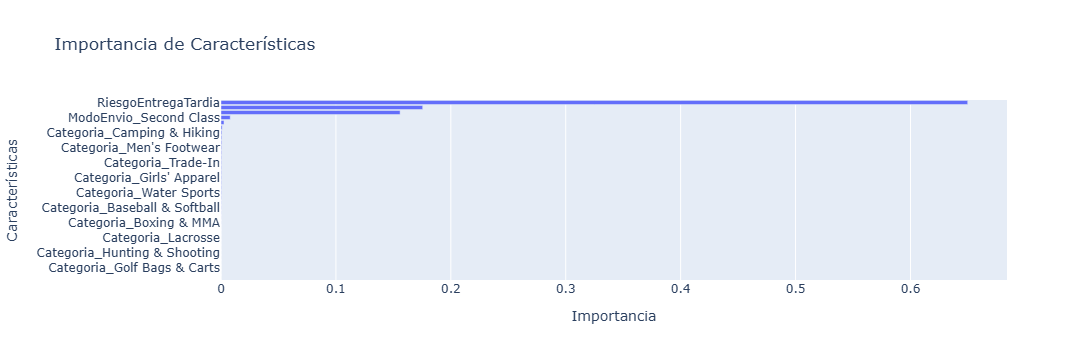

In [967]:
import plotly.graph_objects as go
import numpy as np

# Supongamos que ya has entrenado el modelo y calculado la importancia de características
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]

# Crear el gráfico de barras
fig = go.Figure([go.Bar(x=importances[indices], y=[X.columns[i] for i in indices], orientation='h')])

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Importancia de Características',
    xaxis_title='Importancia',
    yaxis_title='Características',
    yaxis=dict(autorange='reversed')  # Para invertir el orden en el eje y
)

# Mostrar el gráfico
fig.show()


# Validación cruzada
Se realiza validación cruzada en el modelo optimizado y se calcula la precisión promedio, lo que ayuda a evaluar la estabilidad del modelo en diferentes subconjuntos de datos.

In [969]:
# Validación cruzada
cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)
print("Precisión promedio en Validación Cruzada:", cv_scores.mean())

Precisión promedio en Validación Cruzada: 0.9779425518339027


In [970]:
# Filtrando los errores
errors = X_test[y_pred != y_test]
print(errors)


        DiasEnvio(Real)  RiesgoEntregaTardia  Categoria_As Seen on  TV!  \
177934                3                    0                      False   
56225                 3                    0                      False   
51218                 2                    0                      False   
159540                2                    0                      False   
159530                3                    0                      False   
169783                2                    0                      False   
138117                4                    0                      False   
4962                  3                    0                      False   
113325                4                    0                      False   
114765                3                    0                      False   
50790                 4                    0                      False   
5683                  4                    0                      False   
1012                  4  

# Matriz de confusión

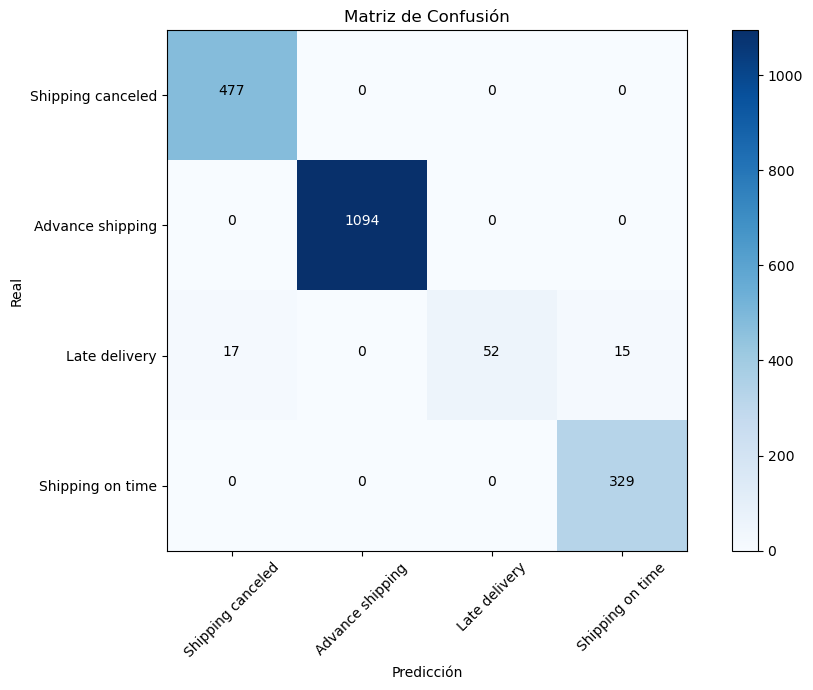

                   precision    recall  f1-score   support

 Advance shipping       0.97      1.00      0.98       477
    Late delivery       1.00      1.00      1.00      1094
Shipping canceled       1.00      0.62      0.76        84
 Shipping on time       0.96      1.00      0.98       329

         accuracy                           0.98      1984
        macro avg       0.98      0.90      0.93      1984
     weighted avg       0.98      0.98      0.98      1984



In [972]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear gráfico de matriz de confusión
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = range(len(set(y_test)))
plt.xticks(tick_marks, set(y_test), rotation=45)
plt.yticks(tick_marks, set(y_test))

# Añadir etiquetas
plt.xlabel('Predicción')
plt.ylabel('Real')

# Añadir valores a las celdas
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))


# Curvas de aprendizaje

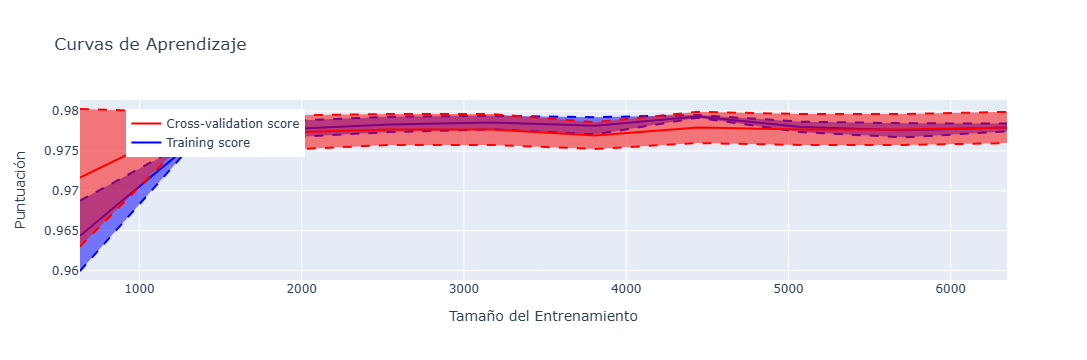

In [974]:
import plotly.graph_objects as go
from sklearn.model_selection import learning_curve
import numpy as np

# Evaluación del rendimiento del modelo en función del tamaño del conjunto de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(best_dt_model, X_train, y_train, 
                                                        cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Media y desviación estándar de los puntajes
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear el gráfico de curvas de aprendizaje
fig = go.Figure()

# Añadir la curva de la puntuación de entrenamiento
fig.add_trace(go.Scatter(
    x=train_sizes, 
    y=train_mean,
    mode='lines',
    name='Training score',
    line=dict(color='blue')
))
fig.add_trace(go.Scatter(
    x=train_sizes,
    y=train_mean + train_std,
    mode='lines',
    name='Training score upper',
    line=dict(color='blue', dash='dash'),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=train_sizes,
    y=train_mean - train_std,
    mode='lines',
    name='Training score lower',
    line=dict(color='blue', dash='dash'),
    fill='tonexty',
    showlegend=False
))

# Añadir la curva de la puntuación de validación cruzada
fig.add_trace(go.Scatter(
    x=train_sizes, 
    y=test_mean,
    mode='lines',
    name='Cross-validation score',
    line=dict(color='red')
))
fig.add_trace(go.Scatter(
    x=train_sizes,
    y=test_mean + test_std,
    mode='lines',
    name='Cross-validation score upper',
    line=dict(color='red', dash='dash'),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=train_sizes,
    y=test_mean - test_std,
    mode='lines',
    name='Cross-validation score lower',
    line=dict(color='red', dash='dash'),
    fill='tonexty',
    showlegend=False
))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Curvas de Aprendizaje',
    xaxis_title='Tamaño del Entrenamiento',
    yaxis_title='Puntuación',
    legend=dict(x=0.05, y=0.95)
)

# Mostrar el gráfico
fig.show()


# REGRESION LOGISTICA

In [976]:
# Importación de dataset desde GitHub con especificación de codificación
url = 'https://raw.githubusercontent.com/ISPC-PP1-2024/proyecto/main/datos/DataCoSupplyChainDataset/DataCoSupplyChainDataset.csv'
df_1 = pd.read_csv(url, encoding='latin1')

# Ver los primeros registros
df_1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [977]:
# Se consulta la base de datos
df_logistica=pd.read_csv('C:\\Users\\Usuario\\Desktop\\2024\\materias\\CDIA\\2semestre\\pp1-cdia23\\ejemplo suply chain\\DataCoSupplyChainDataset.csv\\para jupyter\\DataCoSupplyChainDataset.csv', encoding='latin1', sep=',',  low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Usuario\\Desktop\\2024\\materias\\CDIA\\2semestre\\pp1-cdia23\\ejemplo suply chain\\DataCoSupplyChainDataset.csv\\para jupyter\\DataCoSupplyChainDataset.csv'

In [ ]:
df_logistica = df_logistica[df_logistica['Order Country'].isin(['Argentina', 'Brasil', 'Mexico'])]

In [ ]:
# Cantidad de valores nulos por columna
missing_data = df_logistica.isna().sum()
print(missing_data[missing_data > 0])

In [ ]:
#ELIMINAMOS FILAS DEL DATAFRAME QUE NO USAMOS.
columnas_a_eliminar = ['Category Id','Customer Email','Customer Fname','Customer Lname',
'Customer Password','Customer State','Customer Street','Customer Zipcode','Department Id','Department Name','Latitude',
'Longitude','Market','Order City','Order Customer Id','Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate',
'Order Item Profit Ratio','Product Image','Product Description','Order Zipcode','Product Status']


In [ ]:
df_logistica = df_logistica.drop(columns=columnas_a_eliminar, axis=1)
df_logistica.columns

In [ ]:
#renombro la columna porque tiene espacios
df_logistica.rename(columns={'Category Name':'Categoria',
                           'Type':'Pago'
                           ,'Days for shipping (real)':'DiasEnvio(Real)'
                           , 'Days for shipment (scheduled)':'DiasEnvio(Programado)'
                           , 'Benefit per order':'BeneficioPorPedido'
                           , 'Delivery Status':'EstadoEntrega'
                           , 'Late_delivery_risk':'RiesgoEntregaTardia'
                           , 'Category Name':'Categoria'
                           , 'Customer Country':'PaisCliente'
                           , 'Customer Id':'IDCliente'
                           , 'Customer Segment':'SegmentoCliente'
                           , 'Order Country':'PaisPedido'
                           , 'order date (DateOrders)':'FechaPedido'
                           , 'Order Id':'IDPedido'
                           , 'Order Item Id':'IDArticuloPedido'
                           , 'Order Item Product Price':'PrecioArticuloPedido'
                           , 'Order Item Quantity':'CantidadArticulosPedido'
                           , 'Sales':'Ventas'
                           , 'Order Item Total':'TotalArticulosPedido'
                           , 'Order Profit Per Order':'GananciaPorPedido'
                           , 'Order Region':'RegionPedido'
                           , 'Order State':'DestinoPedido'
                           , 'Order Status':'EstadoPedido'
                           , 'Product Card Id':'IDProducto'
                           , 'Product Category Id':'CategoriaProducto'
                           , 'Product Name':'NombreProducto'
                           , 'Product Price':'PrecioProducto'
                           , 'shipping date (DateOrders)':'FechaEnvio'
                           , 'Shipping Mode':'ModoEnvio' 
                           , 'Customer City':'CiudadCliente'
                           , 'Sales per customer' : 'VentasPorCliente'
                          
                          },inplace=True)


In [ ]:
# Columnas traducidas
df_logistica.info()

In [ ]:
#tamaño del nuevo dataframe
df_logistica.shape

In [ ]:
df_logistica.nunique()

## 2. Análisis exploratorio con gráficos

Un análisis rápido de las variables

In [ ]:
#Tiene missings, minimos, maximos, medias, desviación estandar
df_logistica.describe()

Algo importante a notar aquí es que todas las variables tienen un millón en el conteo, eso indica que ninguna variable tiene registros vacios
Para las tres primeras variables que son continuas se deja al lector la interpretación de la media, desviasión estandar y demas métricas contenidas

In [ ]:
# 1. Examinar la columna antes de la conversión
print("Primeros 5 valores de 'PrecioProducto' antes de la conversión:")
print(df_logistica['PrecioProducto'].head())
print("\nTipo de dato actual:", df_logistica['PrecioProducto'].dtype)

# 2. Función para limpiar y convertir la columna
def clean_and_convert(x):
    if isinstance(x, str):
        return pd.to_numeric(x.replace('$', '').replace(',', ''), errors='coerce')
    return x

# 3. Aplicar la función de conversión
df_logistica['PrecioProducto'] = df_logistica['PrecioProducto'].apply(clean_and_convert)

# 4. Verificar la conversión
print("\nPrimeros 5 valores de 'PrecioProducto' después de la conversión:")
print(df_logistica['PrecioProducto'].head())
print("\nNuevo tipo de dato:", df_logistica['PrecioProducto'].dtype)

# 5. Verificar valores nulos o inválidos
nulos = df_logistica['PrecioProducto'].isnull().sum()
print(f"\nNúmero de valores nulos: {nulos}")

# 6. Estadísticas descriptivas
print("\nEstadísticas descriptivas de 'PrecioProducto':")
print(df_logistica['PrecioProducto'].describe())

# 7. Identificar valores atípicos o sospechosos (opcional)
Q1 = df_logistica['PrecioProducto'].quantile(0.25)
Q3 = df_logistica['PrecioProducto'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

atipicos = df_logistica[(df_logistica['PrecioProducto'] < lower_bound) | (df_logistica['PrecioProducto'] > upper_bound)]
print(f"\nNúmero de valores atípicos: {len(atipicos)}")

# 8. Mostrar algunos valores atípicos si existen
if len(atipicos) > 0:
    print("\nAlgunos valores atípicos:")
    print(atipicos['PrecioProducto'].head())

In [ ]:
# 1. Examinar la columna antes de la conversión
print("Primeros 5 valores de 'Product Price' antes de la conversión:")
print(df_logistica['GananciaPorPedido'].head())
print("\nTipo de dato actual:", df_logistica['GananciaPorPedido'].dtype)

# 2. Función para limpiar y convertir la columna
def clean_and_convert(x):
    if isinstance(x, str):
        return pd.to_numeric(x.replace('$', '').replace(',', ''), errors='coerce')
    return x

# 3. Aplicar la función de conversión
df_logistica['GananciaPorPedido'] = df_logistica['GananciaPorPedido'].apply(clean_and_convert)

# 4. Verificar la conversión
print("\nPrimeros 5 valores de 'Product Price' después de la conversión:")
print(df_logistica['GananciaPorPedido'].head())
print("\nNuevo tipo de dato:", df_logistica['GananciaPorPedido'].dtype)

# 5. Verificar valores nulos o inválidos
nulos = df_logistica['GananciaPorPedido'].isnull().sum()
print(f"\nNúmero de valores nulos: {nulos}")

# 6. Estadísticas descriptivas
print("\nEstadísticas descriptivas de 'Product Price':")
print(df_logistica['GananciaPorPedido'].describe())

# 7. Identificar valores atípicos o sospechosos (opcional)
Q1 = df_logistica['GananciaPorPedido'].quantile(0.25)
Q3 = df_logistica['GananciaPorPedido'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

atipicos = df_logistica[(df_logistica['GananciaPorPedido'] < lower_bound) | (df_logistica['GananciaPorPedido'] > upper_bound)]
print(f"\nNúmero de valores atípicos: {len(atipicos)}")

# 8. Mostrar algunos valores atípicos si existen
if len(atipicos) > 0:
    print("\nAlgunos valores atípicos:")
    print(atipicos['GananciaPorPedido'].head())

# Una regresión lógistica requiere de dos tipos de variables.
1.Variable objetivo: también llamada dependiente, en este caso la variable objetivo es fraud
<br>
2.Variables independientes: en este caso puede ser una o todas las demas dependiendo de la correlación que tengan con la variable objetivo
<br>Dicho esto, todo el análisis exploratorio debe girar en torno a la correlación que exista entre las variables independientes y la dependiente (fraud)
<br>Pero, cuantas transacciones, del millón que contiene la base, fueron marcadas como fraude

In [ ]:
plt.figure(figsize=(4,4))

ax1=sb.countplot(x="RiesgoEntregaTardia", data=df_logistica)
for label in ax1.containers:
    ax1.bar_label(label)
    ax1.set_xticklabels(['0-ATiempo','1-Tardio'])
plt.show()

** Aproximadamente el 45,17 % de las observaciones fueron marcadas como entrega a tiempo (riesgo) Aproximadamente el 54.83 % de las observaciones fueron marcadas como entrega tardia (riesgo)

** Ahora se graficarán las variables continuas considerando la variable objetivo
Para hacer comparables las variables continuas se obtiene el logaritmo base 10, esto también ayuda a tener más cercanos los datos

In [ ]:
df_logistica.columns

In [ ]:
df_logistica['BeneficioPorPedido'] = np.log10(df_logistica['BeneficioPorPedido'])
df_logistica['VentasPorCliente'] = np.log10(df_logistica['VentasPorCliente'])
sb.pairplot(data=df_logistica[['BeneficioPorPedido','VentasPorCliente','RiesgoEntregaTardia']], hue = 'RiesgoEntregaTardia')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_logistica['PaisCliente'] =df_logistica['PaisCliente'] 
label_encoder_PaisCliente=LabelEncoder()

df_logistica['PaisCliente'] = label_encoder_PaisCliente.fit_transform(df_logistica['PaisCliente'])

*** se aprecia que a lo largo de los pedidos no hay variacion significativa entre el porcentaje de riesgo positivo y negativo
***la cantidad de pedidos es mayor en la segunda mitad de,,,pero se comporta igual

In [ ]:
df_logistica['PaisCliente']

In [ ]:
plt.figure(figsize=(4,4))

ax1=sb.countplot(x="PaisCliente", data=df_logistica)
for label in ax1.containers:
    ax1.bar_label(label)
    ax1.set_xticklabels(['0-Puerto Rico','1-EEUU'])
plt.show()

Ahora veamos la correlación que existe con las variables binarias

In [ ]:
variables_binarias = ['PaisCliente', 'PaisPedido','EstadoEntrega','ModoEnvio']
fig,ax = plt.subplots(1,4,figsize=(20,5))

for i,col in enumerate(variables_binarias):
    plt.figure(figsize=(3,4))
    ax[i]=sb.countplot(x=col, data=df_logistica, hue="RiesgoEntregaTardia", ax=ax[i])
    for label in ax[i].containers:
        ax[i].bar_label(label)

##detalle de las graficas,,,,,,,

### Para terminar el análisis exploratorio se hace un mapa de calor que indica las correlaciones, esto puede fortalecer los primeros hallazgos o refutarlos

In [ ]:
data=df_logistica.copy()
data['RIESGO_TARDIO'] = np.where(data['EstadoPedido'] == 'RIESGO_TARDIO', 1, 0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x

In [ ]:
features=data.drop(columns=['RIESGO_TARDIO','EstadoPedido' ])
target=data['RIESGO_TARDIO']

In [ ]:
features.isnull().sum()

In [ ]:
#se consideran los valores NaN , tratarlo para utilizar labelEncoder
features=features.apply(Labelencoder_feature)
features.head()

In [ ]:
#borrar caracteristicas con alta correlacion con otras caracteristicas para evitar multicolinealidad
data1=pd.concat([features,target],axis=1)

In [ ]:
#deleting features which high-correlated with other features to avoid multicollinarity

corr = data1.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data1.columns[columns]
selected_columns

In [ ]:
sb.set(rc = {"figure.figsize":(20, 6)}) #graph size
corr = features.corr()
sb.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "rocket") #viridis, rocket, rocket_r, hot entre otras son las mejores paletas de colores para este caso

In [ ]:
features.shape

# Con este mapa de calor se nota que:
<br> La variable que tiene la mayor correlación
<br> La variables con buena correlación
<br> La variable con correlacion negativa
# 3. Desarrollo y validación de la Regresión Logística
hay valores NAN, hay que limpiar primero.-........luego esto se hace arriba al principio con el tratamiento

In [ ]:
columnas_a_verificar=['Pago', 'DiasEnvio(Real)', 'DiasEnvio(Programado)',
       'BeneficioPorPedido', 'VentasPorCliente', 'EstadoEntrega',
       'RiesgoEntregaTardia', 'Categoria', 'CiudadCliente', 'PaisCliente',
       'IDCliente', 'SegmentoCliente', 'PaisPedido', 'FechaPedido', 'IDPedido',
       'PrecioArticuloPedido', 'CantidadArticulosPedido', 'Ventas',
       'TotalArticulosPedido', 'GananciaPorPedido', 'RegionPedido',
       'DestinoPedido', 'IDProducto', 'NombreProducto', 'PrecioProducto']
# Eliminar filas con al menos un NaN en las columnas especificadas
features = features.dropna(subset=columnas_a_verificar)

In [ ]:
# verificar filas duplicadas
duplicados=features[features.duplicated()]
if duplicados.empty:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print("Las siguientes filas están duplicadas:")
    print(duplicados)

In [ ]:
# Suponiendo que tu DataFrame se llama 'df'
columnas_a_verificar = ['Pago', 'DiasEnvio(Real)', 'DiasEnvio(Programado)',
       'BeneficioPorPedido', 'VentasPorCliente', 'EstadoEntrega',
       'RiesgoEntregaTardia', 'Categoria', 'CiudadCliente', 'PaisCliente',
       'IDCliente', 'SegmentoCliente', 'PaisPedido', 'FechaPedido', 'IDPedido',
       'PrecioArticuloPedido', 'CantidadArticulosPedido', 'Ventas',
       'TotalArticulosPedido', 'GananciaPorPedido', 'RegionPedido',
       'DestinoPedido', 'IDProducto', 'NombreProducto', 'PrecioProducto']

# Verificar si hay valores NaN en las columnas especificadas
valores_nulos = features[columnas_a_verificar].isnull().sum()

print(valores_nulos)

In [ ]:
# verificar espacios vacios
hay_vacios = features.isna().any().any()

if hay_vacios:
    print("El DataFrame contiene valores vacíos.")
else:
    print("El DataFrame no contiene valores vacíos.")

In [ ]:
# Eliminar filas con al menos un NaN en las columnas especificadas
features = features.dropna(subset=columnas_a_verificar)

In [ ]:
# Verificar valores NaN
valores_nulos = features[columnas_a_verificar].isnull().sum()
print(valores_nulos)


In [ ]:
import pandas as pd
import numpy as np

def check_negative_values(features, columns):
    """
    Verifica valores negativos en las columnas especificadas del DataFrame,
    manejando valores no numéricos y nulos.

    Args:
    df (pandas.DataFrame): El DataFrame a verificar
    columns (list): Lista de nombres de columnas a verificar

    Returns:
    dict: Un diccionario con los resultados de la verificación
    """
    results = {}
    for col in columns:
        if col not in features.columns:
            results[col] = f"La columna '{col}' no existe en el DataFrame"
            continue
        
        # Convertir la columna a numérica, coerciendo errores a NaN
        numeric_col = pd.to_numeric(features[col], errors='coerce')
        
        # Contar valores negativos, excluyendo NaN
        negative_count = (numeric_col < 0).sum()
        nan_count = numeric_col.isna().sum()
        
        if negative_count > 0:
            results[col] = f"Se encontraron {negative_count} valores negativos en '{col}'"
        else:
            results[col] = f"No se encontraron valores negativos en '{col}'"
        
        if nan_count > 0:
            results[col] += f". Además, hay {nan_count} valores no numéricos o nulos"

    return results

# Uso de la función
columns_to_check = ['Pago', 'DiasEnvio(Real)', 'DiasEnvio(Programado)',
       'BeneficioPorPedido', 'VentasPorCliente', 'EstadoEntrega',
       'RiesgoEntregaTardia', 'Categoria', 'CiudadCliente', 'PaisCliente',
       'IDCliente', 'SegmentoCliente', 'PaisPedido', 'FechaPedido', 'IDPedido',
       'PrecioArticuloPedido', 'CantidadArticulosPedido', 'Ventas',
       'TotalArticulosPedido', 'GananciaPorPedido', 'RegionPedido',
       'DestinoPedido', 'IDProducto', 'NombreProducto', 'PrecioProducto']
results = check_negative_values(features, columns_to_check)

# Imprimir resultados
for col, result in results.items():
    print(result)

# Información adicional sobre tipos de datos
print("\nTipos de datos de las columnas:")
for col in columns_to_check:
    if col in features.columns:
        print(f"{col}: {features[col].dtype}")
    else:
        print(f"{col}: Columna no encontrada")

# fin de valores NAN------------------------------
# formatear valores

# Se crea una variable X que contendrá las variables independientes

In [ ]:
features.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Realizo label encoder para las no numericas
label_encoder_Pago = LabelEncoder()
label_encoder_EstadoEntrega = LabelEncoder()
label_encoder_PaisCliente = LabelEncoder()
label_encoder_Categoria = LabelEncoder()
label_encoder_PaisPedido = LabelEncoder()
label_encoder_SegmentoCliente = LabelEncoder()
label_encoder_RegionPedido = LabelEncoder()
label_encoder_DestinoPedido = LabelEncoder()
label_encoder_EstadoPedido = LabelEncoder()
label_encoder_CiudadCliente  = LabelEncoder()
label_encoder_TotalArticulosPedido = LabelEncoder()
label_encoder_NombreProducto = LabelEncoder()
label_encoder_ModoEnvio=LabelEncoder()

In [ ]:
features['Pago'] = label_encoder_Pago.fit_transform(features['Pago'])
features['EstadoEntrega'] = label_encoder_EstadoEntrega.fit_transform(features['EstadoEntrega'])
features['PaisCliente'] = label_encoder_PaisCliente.fit_transform(features['PaisCliente'])
features['Categoria'] = label_encoder_Categoria.fit_transform(features['Categoria'])
features['PaisPedido'] = label_encoder_PaisPedido.fit_transform(features['PaisPedido'])
features['SegmentoCliente'] = label_encoder_SegmentoCliente.fit_transform(features['SegmentoCliente'])
features['RegionPedido'] = label_encoder_RegionPedido.fit_transform(features['RegionPedido'])
features['DestinoPedido'] = label_encoder_DestinoPedido.fit_transform(features['DestinoPedido'])
#features['EstadoPedido'] = label_encoder_EstadoPedido.fit_transform(features['EstadoPedido'])
features['CiudadCliente'] = label_encoder_CiudadCliente .fit_transform(features['CiudadCliente'])
features['TotalArticulosPedido'] = label_encoder_TotalArticulosPedido.fit_transform(features['TotalArticulosPedido'])
features['NombreProducto'] = label_encoder_NombreProducto.fit_transform(features['NombreProducto'])
features['ModoEnvio'] = label_encoder_ModoEnvio.fit_transform(features['ModoEnvio'])

In [ ]:
X = np.asarray(features[['Pago','EstadoEntrega','PaisCliente','Categoria','PaisPedido','SegmentoCliente','RegionPedido','DestinoPedido','CiudadCliente',
'ModoEnvio']])
X[0:5]

# Ahora se crea la variable independiente

Se estandirzan las variables incependientes, esto se hace por que variables con valores más altos pueden influir más en el modelo, de esta manera todas las variables están en terminos similares

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [ ]:
y = np.asarray(features['RiesgoEntregaTardia'])
y [0:5]

# Se separa el conjunto de datos entre entrenamiento y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

** El conjunto de entrenamiento contiene el 80% de los datos y el de test el 20%

# Se entrena la Regresión Logística

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

# Una regresión logistica arroja una probabilidad de que el resultado sea 1 y una probabilidad de que sea cero
# Hecho eso, se asigna el número 1 o 0 según sea mayor la probabilidad
# Se utiliza la regresión entrenada para que arroje las probabilidades

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

Son dos columnas por que una indica la probabilidad de que sea cero ese registro y el otra columna indica la probabilidad de que sea uno

<br>Sin embargo, también se puede obtener directamente el resultado de uno o cero

In [ ]:
df_logistica.shape

In [ ]:
yhat = LR.predict(X_test)
yhat

Se podría ver la tabla con una columna de Riesgo real y una de Riesgo predecido, pero es más útil ver una matriz de confusión de cuantos casos se predijeron de manera correcta

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, with normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

### En esta matriz de confusión vale la pena dedicar algunas líneas, puesto que indica que tan bien o mal esta el modelo prediciendo:

[1451 1078]  total de casos=23090
 [1100  ]]
1. Se tienen 989 casos marcados como 0 y que efectivamente eran 0. 
    1. De todos los casos que eran efectivamente cero (1100 + 989 = 2.089) el 0,473% (989/2089) fue correctamente predecido -> Esta métrica es conocida como calidad
    1. De todos los casos que el modelo marco como 0 (1078 + 989 = 2.067) el 0,0,478% (989/2067) eran efectivamente cero -> Esta métrica es conocida como precisión
1. Se tienen 1451 casos marcados como 1 y que efectivamente eran 1.
    1. De todos los casos que eran efectivamente uno (1451 +1078 =  2529) el 0,573%  fue correctamente predecido
    1. De todos los casos que el modelo marco como 1 (1451 + 1100 = 2551) el 0,431%  eran efectivamente uno

### Todo esto se puede observar en el siguiente reporte que se obtiene de directamente de Python

In [ ]:
print (classification_report(y_test, yhat))

F1 Score es una combinación de la precisión y la calidad, indica con que tanta certeza el modelo esta funcionando, se puede decir que en general el modelo tiene un xxxx% de certeza

Otro Score a considerar es el Jaccard Score, y se puede obtener de la siguiente manera

In [ ]:
jaccard_score(y_test, yhat,pos_label=0)

xxxxx% como se observa es muy parecido, en este caso, al f1-score

In [ ]:
LR.coef_[0]

# Como última validación del modelo, se revisa cuanto peso tienen las variables independientes en el resultado de la predicción

In [ ]:
def get_feature_importance (LR, feature_names):
    feature_importance = (
        pd.DataFrame(
            {
                'Variable': feature_names,
                'Coeficiente': LR.coef_[0]
            }
        )
        .round(decimals=2) \
        .sort_values('Coeficiente', ascending=False) \
        .style.bar(color=['red', 'green'], align='zero')
    )
    return feature_importance

In [ ]:
get_feature_importance(LR, ['Pago','EstadoEntrega','PaisCliente','Categoria','PaisPedido','SegmentoCliente','RegionPedido','DestinoPedido','CiudadCliente',
'ModoEnvio'])

INTERPRETAR EL RESULTADO SEGUN LA INCIDENCIA DE CADA VARIABLE------------------

# Conclusiones:
1. Se realizo el análisis inicial de la base de datos, es una base muy limpia, sin missings ni duplicados
1. El análisis exploratorio utilizando principalmente la libreria de seaborn que resultó muy poderosa para darnos información de manera gráfica de las variables
1. Una Regresión Logística fue entrenada y validada con un poder predictivo de XXXXX%

# Clustering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:
#Importación de dataset desde github
url = 'https://github.com/ISPC-PP1-2024/proyecto/blob/main/datos/DataCoSupplyChainDataset/DataCoSupplyChainDataset.csv'
df_1 = pd.read_csv(url)

In [ ]:
# Se consulta la base de datos
df_1=pd.read_csv('C:\\Users\\Usuario\\Desktop\\2024\\materias\\CDIA\\2semestre\\pp1-cdia23\\ejemplo suply chain\\DataCoSupplyChainDataset.csv\\para jupyter\\DataCoSupplyChainDataset.csv', encoding='latin1', sep=',',  low_memory=False)

In [ ]:
df = df_1[df_1['Order Country'].isin(['Argentina', 'Brasil', 'Mexico'])]

#tomar las primeras 100 filas de cada pais para reducir el dataset a fines practicos,

In [ ]:
#esto es para probar con un dataset menor a ver si se ven mejores los puntos en los graficos de dispersion
#de los clusters
#---lo que hace es tomar las primeras 100 filas de cada pais filtrado
#---el dataset contiene 300 filas, 100 de argentina, 100 de brasil y 100 de mexico

# Agrupar por país y contar
grouped = df.groupby('Order Country')
counts = grouped.size()

# Función para limitar por país
def limit_by_country(group, limit=100):
    return group.head(limit)

# Aplicar la función y reiniciar el índice
df_filtered = grouped.apply(limit_by_country).reset_index(drop=True)

# Mostrar el DataFrame resultante
#print(df_filtered)
df_filtered.head()

In [ ]:
df=df_filtered

In [ ]:
df_filtered.shape

In [ ]:
# con este seguimos trabajando
df.shape

In [ ]:
df.info()

In [ ]:
# Cantidad de valores nulos por columna
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])

In [ ]:
#ELIMINAMOS FILAS DEL DATAFRAME QUE NO USAMOS.
columnas_a_eliminar = ['Sales per customer','Category Id','Customer Email','Customer Fname','Customer Lname',
'Customer Password','Customer State','Customer Street','Customer Zipcode','Department Id','Department Name','Latitude',
'Longitude','Market','Order City','Order Customer Id','Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate',
'Order Item Profit Ratio','Product Image','Product Description','Order Zipcode','Product Status']

df = df.drop(columns=columnas_a_eliminar, axis=1)

In [ ]:
df.columns

In [ ]:
#CAMBIAR LAS COLUMNAS A ESPAÑOL
#// prueba para cambiar los valores de las columnas a español
df_espanol=df

In [ ]:
#renombro la columna porque tiene espacios
df_espanol.rename(columns={'Category Name':'Categoria',
                           'Type':'Pago'
                           ,'Days for shipping (real)':'DiasEnvio(Real)'
                           , 'Days for shipment (scheduled)':'DiasEnvio(Programado)'
                           , 'Benefit per order':'BeneficioPorPedido'
                           , 'Delivery Status':'EstadoEntrega'
                           , 'Late_delivery_risk':'RiesgoEntregaTardia'
                           , 'Category Name':'Categoria'
                           , 'Customer Country':'PaisCliente'
                           , 'Customer Id':'IDCliente'
                           , 'Customer Segment':'SegmentoCliente'
                           , 'Order Country':'PaisPedido'
                           , 'order date (DateOrders)':'FechaPedido'
                           , 'Order Id':'IDPedido'
                           , 'Order Item Id':'IDArticuloPedido'
                           , 'Order Item Product Price':'PrecioArticuloPedido'
                           , 'Order Item Quantity':'CantidadArticulosPedido'
                           , 'Sales':'Ventas'
                           , 'Order Item Total':'TotalArticulosPedido'
                           , 'Order Profit Per Order':'GananciaPorPedido'
                           , 'Order Region':'RegionPedido'
                           , 'Order State':'DestinoPedido'
                           , 'Order Status':'EstadoPedido'
                           , 'Product Card Id':'IDProducto'
                           , 'Product Category Id':'CategoriaProducto'
                           , 'Product Name':'NombreProducto'
                           , 'Product Price':'PrecioProducto'
                           , 'shipping date (DateOrders)':'FechaEnvio'
                           , 'Shipping Mode':'ModoEnvio' 
                           , 'Customer City':'CiudadCliente'
                          
                          },inplace=True)

In [ ]:
# Columnas traducidas
df_espanol.info()

In [ ]:
#tamaño del nuevo dataframe
df_espanol.shape

In [ ]:
df_espanol.nunique()

In [ ]:
# verificar filas duplicadas
duplicados=df_espanol[df.duplicated()]
if duplicados.empty:
    print("No hay filas duplicadas en el DataFrame.")
else:
    print("Las siguientes filas están duplicadas:")
    print(duplicados)

In [ ]:
# verificar espacios vacios
hay_vacios = df_espanol.isna().any().any()

if hay_vacios:
    print("El DataFrame contiene valores vacíos.")
else:
    print("El DataFrame no contiene valores vacíos.")

In [ ]:
# convertir las columnas no numericas a numericas y con formato sin puntos

import re
import pandas as pd

def clean_price(price_str):
    if pd.isna(price_str):
        return None
    
    # Convertir a string si no lo es
    price_str = str(price_str)
    
    # Eliminar espacios en blanco y caracteres no numéricos excepto punto y coma
    cleaned = re.sub(r'[^\d.,]', '', price_str)
    
    # Reemplazar coma por punto si hay más de un punto (asumiendo que la coma es el separador decimal)
    if cleaned.count('.') > 1 and ',' in cleaned:
        cleaned = cleaned.replace(',', '.')
    
    # Si hay más de un punto, asumimos que todos menos el último son separadores de miles
    parts = cleaned.split('.')
    if len(parts) > 2:
        integer_part = ''.join(parts[:-1])
        decimal_part = parts[-1]
        cleaned = f"{integer_part}.{decimal_part}"
    
    try:
        return float(cleaned)
    except ValueError:
        print(f"No se pudo convertir: {price_str}")
        return None

# Aplicar la función a la columna 'Product Price' y mostrar los resultados
df_espanol['Clean Price'] = df_espanol['PrecioProducto'].apply(clean_price)

# Mostrar filas donde la limpieza falló
failed_conversions = df_espanol[df_espanol['PrecioProducto'].isna()]
print("Filas donde la conversión falló:")
print(failed_conversions[['PrecioProducto', 'Clean Price']])

# Calcular la mediana de los precios limpios
median_prices = df_espanol.groupby('Categoria')['Clean Price'].median()
print("\nMediana de precios de productos segun categoria:")
print(median_prices)

# Calcular la media de los precios limpios
media_prices = df_espanol.groupby('Categoria')['Clean Price'].mean()
print("\nMedia de precios  de productos segun categoria:")
print(media_prices)
# Calcular la desviacion estandar de los precios limpios
std_prices = df_espanol.groupby('Categoria')['Clean Price'].std()
print("\nDesviacion estandar de productos segun categoria:")
print(std_prices)

# Mostrar estadísticas de la columna de precios limpios
print("\nEstadísticas de la columna de precio de productos:")
print(df_espanol['Clean Price'].describe())

In [ ]:
# convertir las columnas no numericas a numericas y con formato sin puntos

import re
import pandas as pd

def clean_Beneficio_por_pedido(benPP_str):
    if pd.isna(benPP_str):
        return None
    
    # Convertir a string si no lo es
    benPP_str = str(benPP_str)
    
    # Eliminar espacios en blanco y caracteres no numéricos excepto punto y coma
    cleaned = re.sub(r'[^\d.,]', '', benPP_str)
    
    # Reemplazar coma por punto si hay más de un punto (asumiendo que la coma es el separador decimal)
    if cleaned.count('.') > 1 and ',' in cleaned:
        cleaned = cleaned.replace(',', '.')
    
    # Si hay más de un punto, asumimos que todos menos el último son separadores de miles
    parts = cleaned.split('.')
    if len(parts) > 2:
        integer_part = ''.join(parts[:-1])
        decimal_part = parts[-1]
        cleaned = f"{integer_part}.{decimal_part}"
    
    try:
        return float(cleaned)
    except ValueError:
        print(f"No se pudo convertir: {benPP_str}")
        return None

# Aplicar la función a la columna 'Benefit per order' y mostrar los resultados
df_espanol['clean_Beneficio_por_pedido'] = df_espanol['BeneficioPorPedido'].apply(clean_Beneficio_por_pedido)

# Mostrar filas donde la limpieza falló
failed_conversions = df_espanol[df_espanol['clean_Beneficio_por_pedido'].isna()]
print("Filas donde la conversión falló:")
print(failed_conversions[['BeneficioPorPedido', 'clean_Beneficio_por_pedido']])

# Calcular la mediana -Beneficio por orden limpio
median_prices = df_espanol.groupby('IDPedido')['clean_Beneficio_por_pedido'].median()
print("\nMediana de precios por producto:")
print(median_prices)
# Calcular la media -Beneficio por orden limpio
media_prices = df_espanol.groupby('IDPedido')['clean_Beneficio_por_pedido'].mean()
print("\nMedia de precios  de productos segun categoria:")
print(media_prices)
# Calcular la desviacion estandar -Beneficio por orden limpio
std_prices = df_espanol.groupby('IDPedido')['clean_Beneficio_por_pedido'].std()
print("\nDesviacion estandar de productos segun categoria:")
print(std_prices)

# Mostrar estadísticas de la columna de precios limpios
print("\nEstadísticas de la columna Beneficio por Pedido:")
print(df_espanol['clean_Beneficio_por_pedido'].describe())

In [ ]:
import re
import pandas as pd

def clean_Beneficio_por_pedido(benPP_str):
    if pd.isna(benPP_str):
        return None
    
    # Convertir a string si no lo es
    benPP_str = str(benPP_str)
    
    # Eliminar espacios en blanco y caracteres no numéricos excepto punto y coma
    cleaned = re.sub(r'[^\d.,]', '', benPP_str)
    
    # Reemplazar coma por punto si hay más de un punto (asumiendo que la coma es el separador decimal)
    if cleaned.count('.') > 1 and ',' in cleaned:
        cleaned = cleaned.replace(',', '.')
    
    # Si hay más de un punto, asumimos que todos menos el último son separadores de miles
    parts = cleaned.split('.')
    if len(parts) > 2:
        integer_part = ''.join(parts[:-1])
        decimal_part = parts[-1]
        cleaned = f"{integer_part}.{decimal_part}"
    
    try:
        return float(cleaned)
    except ValueError:
        print(f"No se pudo convertir: {benPP_str}")
        return None

# Aplicar la función a la columna 'Benefit per order' y mostrar los resultados
df_espanol['clean_Ventas'] = df_espanol['Ventas'].apply(clean_Beneficio_por_pedido)

# Mostrar filas donde la limpieza falló
failed_conversions = df_espanol[df_espanol['clean_Ventas'].isna()]
print("Filas donde la conversión falló:")
print(failed_conversions[['Ventas', 'clean_Ventas']])

# Calcular la mediana -Beneficio por orden limpio
median_prices = df_espanol.groupby('IDPedido')['clean_Ventas'].median()
print("\nMediana de precios por producto:")
print(median_prices)
# Calcular la media -Beneficio por orden limpio
media_prices = df_espanol.groupby('IDPedido')['clean_Ventas'].mean()
print("\nMedia de precios  de productos segun categoria:")
print(media_prices)
# Calcular la desviacion estandar -Beneficio por orden limpio
std_prices = df_espanol.groupby('IDPedido')['clean_Ventas'].std()
print("\nDesviacion estandar de productos segun categoria:")
print(std_prices)

# Mostrar estadísticas de la columna de precios limpios
print("\nEstadísticas de la columna Beneficio por Pedido:")
print(df_espanol['clean_Ventas'].describe())

# AQUI COMENZAMOS CON EL CLUSTERING USANDO EL CODIGO ANTERIOR

In [ ]:
pd.DataFrame(df_espanol.describe()).style.set_caption("Summary Statistics of Numeric Variables")

In [ ]:
pd.DataFrame(df_espanol.select_dtypes('object').describe().T).style.set_caption("Summary Statistics of Categorical Variables")

# Analisis EDA

In [ ]:
df_espanol

In [ ]:
init_notebook_mode(connected=True)
plot_df=df_espanol.copy()
plot_df['clean_Beneficio_por_pedido']=plot_df['clean_Beneficio_por_pedido'].div(10000)
p1=plot_df.groupby('PaisPedido')['DiasEnvio(Real)'].mean().round(0).astype(int).reset_index()
p2=plot_df.groupby('PaisPedido')['clean_Beneficio_por_pedido'].mean().reset_index()
p3=plot_df.groupby('PaisPedido')['DiasEnvio(Programado)'].mean().round(0).astype(int).reset_index()

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Distribucion de dias reales por pais","Media Dias Entrega Real por Pais ",  
                                    "Distribucion de dias programados por pais", "Media de dias programados por pais",
                                    "Distribution of GananciaPorPedido por pais", "Media de Beneficio por pais")
                   )

In [ ]:
fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=="Argentina"]['DiasEnvio(Real)'], histnorm='probability density', 
                           marker=dict(color='#508B8D',opacity=0.7, line=dict(width=1, color='#000000')), 
                           nbinsx=20, name="Argentina"),
              row=1, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=="Brasil"]['DiasEnvio(Real)'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB',opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Brasil"),
              row=1, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=="Mexico"]['DiasEnvio(Real)'], histnorm='probability density', 
                           marker=dict(color='#F3ffCB',opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Mexico"),
              row=1, col=1)

fig.add_trace(go.Bar(x=p1['PaisPedido'], y=p1['DiasEnvio(Real)'], text=p1['DiasEnvio(Real)'], texttemplate='%{text} ', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Age Among %{x} = %{y} <extra></extra>', showlegend=False),
              row=1, col=2)



fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=='Argentina']['clean_Beneficio_por_pedido'], histnorm='probability density', 
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')), 
                           opacity=0.7, name="Argentina", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=='Brasil']['clean_Beneficio_por_pedido'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Brasil", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=="Mexico"]['clean_Beneficio_por_pedido'], histnorm='probability density', 
                           marker=dict(color='#F3ffCB',opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Mexico"),
              row=2, col=1)
fig.add_trace(go.Bar(x=p2['PaisPedido'], y=p2['clean_Beneficio_por_pedido'], text=p2['clean_Beneficio_por_pedido'], 
                     texttemplate='%{text}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Spending Score Among %{x} = %{y}<extra></extra>', showlegend=False),
              row=2, col=2)


fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=="Argentina"]['DiasEnvio(Programado)'], histnorm='probability density', 
                           marker=dict(color='#508B8D',opacity=0.7, line=dict(width=1, color='#000000')), 
                           nbinsx=20, name="Argentina"),
              row=3, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=="Brasil"]['DiasEnvio(Programado)'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB',opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Brasil"),
              row=3, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.PaisPedido=="Mexico"]['DiasEnvio(Programado)'], histnorm='probability density', 
                           marker=dict(color='#F3ffCB',opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Mexico"),
              row=3, col=1)

fig.add_trace(go.Bar(x=p3['PaisPedido'], y=p3['DiasEnvio(Programado)'], text=p3['DiasEnvio(Programado)'], texttemplate='%{text} ', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Age Among %{x} = %{y} <extra></extra>', showlegend=False),
              row=3, col=2)



fig.update_traces(marker=dict(line=dict(width=1, color='#000000')))
fig.update_layout(template=temp,barmode='overlay', height=1500, width=700,
                  legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.03, x=.97),
                  xaxis1_title="DiasEnvio(Real)", yaxis1_title='Densidad de Probabilidad', 
                  xaxis2_title="PaisPedido", yaxis2_title="DiasEnvio(Real)", yaxis2_range=[0,45],
                  xaxis3_title="clean_Beneficio_por_pedido, $", yaxis3_title='Densidad de Probabilidad', 
                  xaxis4_title="PaisPedido", yaxis4_title="clean_Beneficio_por_pedido, $", yaxis4_range=[0,69e3],
                  xaxis5_title="DiasEnvio(Programado)", yaxis5_title='Densidad de Probabilidad', 
                  xaxis6_title="PaisPedido", yaxis6_title="DiasEnvio(Programado)", yaxis6_range=[0,59]
                 )
fig.show()


In [ ]:
# Seleccionamos solo las columnas de interés
columnas_deseadas = ['PaisPedido','DiasEnvio(Real)', 'DiasEnvio(Programado)', 'clean_Beneficio_por_pedido']
plot_df_reducido = plot_df[columnas_deseadas]

# por partes
columnas_EnvioReal = ['PaisPedido','DiasEnvio(Real)']
plot_df_reducido1 = plot_df[columnas_EnvioReal]
# por partes
columnas_EnvioProgramado = ['PaisPedido','DiasEnvio(Programado)']
plot_df_reducido2 = plot_df[columnas_EnvioProgramado]
# por partes
columnas_Beneficio = ['PaisPedido','clean_Beneficio_por_pedido']
plot_df_reducido3 = plot_df[columnas_Beneficio]


In [ ]:
# Pairplots

fig = ff.create_scatterplotmatrix(plot_df_reducido1, diag='box', index='PaisPedido', colormap=['#508B8D', '#F0CABD']) 
fig.update_traces(marker=dict(size=9, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(title="Envio real segun pais", template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, x=.35),
                  height=450, width=350)
fig.show() 

In [ ]:
# Pairplots

fig = ff.create_scatterplotmatrix(plot_df_reducido2, diag='box', index='PaisPedido', colormap=['#508B8D', '#F0CABD']) 
fig.update_traces(marker=dict(size=9, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(title="Envio programado segun pais", template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, x=.35),
                  height=450, width=350)
fig.show() 

In [ ]:
fig = ff.create_scatterplotmatrix(plot_df_reducido3, diag='box', index='PaisPedido', colormap=['#508B8D', '#F0CABD']) 
fig.update_traces(marker=dict(size=9, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(title="Beneficio por pedido segun pais", template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, x=.35),
                  height=450, width=350)
fig.show() 

In [ ]:
plot_df.info()

In [ ]:
# Seleccionamos solo las columnas de interés
columnas_deseadas = ['RiesgoEntregaTardia','DiasEnvio(Real)', 'DiasEnvio(Programado)', 'clean_Beneficio_por_pedido','IDCliente','IDPedido','CantidadArticulosPedido', 'IDProducto','CategoriaProducto','Clean Price']
plot_df_reducido = plot_df[columnas_deseadas]

# --- si quiero variables categoricas, debo convertirlas a numeros 

In [ ]:
# Correlaciones de interes
corr=plot_df_reducido.corr()
x = corr.columns.tolist() 
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='mint', 
                                  reversescale=True, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(template=temp, title="Correlaciones de interes", yaxis_tickangle=-30)
fig.show()


Resumen de EDA

En general, 
1-las distribuciones son bastante proporcionales entre ellas
<br>2- Según las correlaciones y los diagramas de dispersión, las variables en el conjunto de datos no tienen relaciones muy fuertes entre sí. 

falta:
- analisis detalle de cada variable de los graficos

# Agrupamientos

Agrupamiento de K-Means

El agrupamiento de K-Means es un método de agrupamiento simple pero poderoso que crea k segmentos distintos de los datos donde la variación dentro de los grupos es lo más pequeña posible. 
<br>1- Para encontrar el número óptimo de grupos, se prueban diferentes valores de k y se calcula la inercia, o el puntaje de distorsión, para cada modelo. 
<br>2-La inercia mide la similitud de los grupos calculando la distancia total entre los puntos de datos y su centro de grupo más cercano. 
<br>3- Los grupos con observaciones similares tienden a tener distancias más pequeñas entre ellos y un puntaje de distorsión más bajo en general.

# hay que poner numericos las variables categoricas para poder hacer la grafica

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
plot_df1=df_espanol.copy()

In [ ]:
#Realizo label encoder para las no numericas
label_encoder_Pago = LabelEncoder()
label_encoder_EstadoEntrega = LabelEncoder()
label_encoder_PaisCliente = LabelEncoder()
label_encoder_Categoria = LabelEncoder()
label_encoder_PaisPedido = LabelEncoder()
label_encoder_SegmentoCliente = LabelEncoder()
label_encoder_RegionPedido = LabelEncoder()
label_encoder_DestinoPedido = LabelEncoder()
label_encoder_EstadoPedido = LabelEncoder()
label_encoder_CiudadCliente  = LabelEncoder()
label_encoder_TotalArticulosPedido = LabelEncoder()
label_encoder_NombreProducto = LabelEncoder()
label_encoder_ModoEnvio=LabelEncoder()


In [ ]:
columnas_a_eliminar = ['FechaEnvio','FechaPedido','BeneficioPorPedido','PrecioArticuloPedido','Ventas','GananciaPorPedido'
,'PrecioArticuloPedido','Ventas','TotalArticulosPedido','PrecioProducto']
plot_df1 = plot_df1.drop(columns=columnas_a_eliminar)

In [ ]:
plot_df1.info()

In [ ]:
plot_df1['Pago'] = label_encoder_Pago.fit_transform(plot_df['Pago'])
plot_df1['EstadoEntrega'] = label_encoder_EstadoEntrega.fit_transform(plot_df['EstadoEntrega'])
plot_df1['PaisCliente'] = label_encoder_PaisCliente.fit_transform(plot_df['PaisCliente'])
plot_df1['Categoria'] = label_encoder_Categoria.fit_transform(plot_df['Categoria'])
plot_df1['PaisPedido'] = label_encoder_PaisPedido.fit_transform(plot_df['PaisPedido'])
plot_df1['SegmentoCliente'] = label_encoder_SegmentoCliente.fit_transform(plot_df['SegmentoCliente'])
plot_df1['RegionPedido'] = label_encoder_RegionPedido.fit_transform(plot_df['RegionPedido'])
plot_df1['DestinoPedido'] = label_encoder_DestinoPedido.fit_transform(plot_df['DestinoPedido'])
plot_df1['EstadoPedido'] = label_encoder_EstadoPedido.fit_transform(plot_df['EstadoPedido'])
plot_df1['CiudadCliente'] = label_encoder_CiudadCliente .fit_transform(plot_df['CiudadCliente'])
plot_df1['TotalArticulosPedido'] = label_encoder_TotalArticulosPedido.fit_transform(plot_df['TotalArticulosPedido'])
plot_df1['NombreProducto'] = label_encoder_NombreProducto.fit_transform(plot_df['NombreProducto'])
plot_df1['ModoEnvio'] = label_encoder_ModoEnvio.fit_transform(plot_df['ModoEnvio'])

In [ ]:
plot_df1.info()

# aqui ver si hay variables de interes...para tener en cuenta para los clusters

In [ ]:
# Correlaciones en general
corr=plot_df1.corr()
x = corr.columns.tolist() 
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='mint', 
                                  reversescale=True, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(template=temp, title="Correlaciones entre variable", yaxis_tickangle=-30)
fig.show()

In [ ]:
plot_df1.head()

In [ ]:
#import pandas as pd

def buscar_valor(plot_df1, valor_a_buscar):
    for columna in plot_df1.columns:
        if valor_a_buscar in df[columna].values:
            print(f"El valor {valor_a_buscar} se encontró en la columna: {columna}")

# Ejemplo de uso:
buscar_valor(df, "3.999.000.168")

In [ ]:
# K-Means Clustering
plot_df = plot_df1.copy()
#plot_df['PaisPedido'] = [1 if i == "Argentina" else 0 for i in plot_df.PaisPedido]

k_means = list()
for clust in range(1,16):
    km = KMeans(n_clusters=clust, init='k-means++', random_state=21).fit(plot_df1)
    k_means.append(pd.Series({'Clusters': clust, 
                              'Inertia': km.inertia_,
                              'model': km}))

# Plot results
plot_km = (pd.concat(k_means, axis=1).T
           [['Clusters','Inertia']]
           .set_index('Clusters'))

fig = px.line(plot_km, x=plot_km.index, y='Inertia', markers=True)
fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="darkgrey")
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=.31,
    y=75e3,
    text="Optimal Number of Clusters",
    axref="x domain",
    ayref="y",
    ax=.43,
    ay=12e4,
    arrowhead=2, 
    bordercolor="#585858",
    borderpad=4, 
    bgcolor='white',
    font=dict(size=14)
)
fig.update_traces(line_color='#518C89')
fig.update_layout(template=temp, title="K-Means Clustering Elbow Curve", 
                  xaxis=dict(tickmode = 'linear', showline=True), yaxis=dict(showline=True), width=700)
fig.show()


In [ ]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="Clean Price", y="TotalArticulosPedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Precio vs. Total de Articulos", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Precio, $', showline=True, zeroline=False), 
                  yaxis=dict(title='TotalArticulosPedido', ticksuffix='k', showline=True))
fig.show()

In [ ]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="clean_Ventas", y="clean_Beneficio_por_pedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Ventas vs. Beneficio por pedido", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Ventas', showline=True, zeroline=False), 
                  yaxis=dict(title='Beneficio_por_pedido, $', ticksuffix='k', showline=True))
fig.show()

In [ ]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="clean_Ventas", y="CiudadCliente", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Ventas vs. CiudadCliente", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Venta', showline=True, zeroline=False), 
                  yaxis=dict(title='CiudadCliente', ticksuffix='k', showline=True))
fig.show()

In [ ]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="clean_Ventas", y="TotalArticulosPedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Ventas vs. TotalArticulosPedido", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Ventas', showline=True, zeroline=False), 
                  yaxis=dict(title='TotalArticulosPedido', ticksuffix='k', showline=True))
fig.show()

In [ ]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="CiudadCliente", y="TotalArticulosPedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>CiudadCliente vs. TotalArticulosPedido", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='CiudadCliente', showline=True, zeroline=False), 
                  yaxis=dict(title='TotalArticulosPedido', ticksuffix='k', showline=True))
fig.show()

In [ ]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="DiasEnvio(Real)", y="TotalArticulosPedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>DiasEnvio(Real) vs. TotalArticulosPedido", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='DiasEnvio(Real)', showline=True, zeroline=False), 
                  yaxis=dict(title='TotalArticulosPedido', ticksuffix='k', showline=True))
fig.show()

In [ ]:
 # K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="CantidadArticulosPedido", y="TotalArticulosPedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>CantidadArticulosPedido vs. TotalArticulosPedido", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='CantidadArticulosPedido', showline=True, zeroline=False), 
                  yaxis=dict(title='TotalArticulosPedido', ticksuffix='k', showline=True))
fig.show()

In [ ]:
  # K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="ModoEnvio", y="Clean Price", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>ModoEnvio vs. Precio", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='ModoEnvio', showline=True, zeroline=False), 
                  yaxis=dict(title='Precio, $', ticksuffix='k', showline=True))
fig.show()

In [ ]:
 # K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="Pago", y="Clean Price", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Forma de Pago vs. Precio", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Pagoe', showline=True, zeroline=False), 
                  yaxis=dict(title='Precio, $', ticksuffix='k', showline=True))
fig.show()

In [ ]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="Pago", y="Categoria", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Pago vs. Categoria", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Pago', showline=True, zeroline=False), 
                  yaxis=dict(title='Categoria, $', ticksuffix='k', showline=True))
fig.show()

In [ ]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="Categoria", y="CiudadCliente", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Categoria vs. CiudadCliente", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Categoria', showline=True, zeroline=False), 
                  yaxis=dict(title='CiudadCliente', ticksuffix='k', showline=True))
fig.show()

In [ ]:

    # K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="clean_Beneficio_por_pedido", y="clean_Ventas", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Beneficio por pedido vs. Ventas", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Beneficio por pedido', showline=True, zeroline=False), 
                  yaxis=dict(title='Ventas, $', ticksuffix='k', showline=True))
fig.show()

In [ ]:

    # K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="TotalArticulosPedido", y="Clean Price", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>TotalArticulosPedido vs. Precio", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='TotalArticulosPedido', showline=True, zeroline=False), 
                  yaxis=dict(title='Precio, $', ticksuffix='k', showline=True))
fig.show()

In [ ]:
 # K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clustersclean_Beneficio_por_pedido
fig = px.scatter(plot_km, x="Categoria", y="IDPedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Categoria vs. IDPedido", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Categoria', showline=True, zeroline=False), 
                  yaxis=dict(title='IDPedido', ticksuffix='k', showline=True))
fig.show()

In [ ]:
 # K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clustersclean_Beneficio_por_pedido
fig = px.scatter(plot_km, x="clean_Ventas", y="IDPedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Ventas vs. IDPedido", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Ventas', showline=True, zeroline=False), 
                  yaxis=dict(title='IDPedido', ticksuffix='k', showline=True))
fig.show()

In [ ]:
 # K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(plot_df1)
plot_km=plot_df1.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clustersclean_Beneficio_por_pedido
fig = px.scatter(plot_km, x="Clean Price", y="IDPedido", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Precio producto vs. Pedidos", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Precio', showline=True, zeroline=False), 
                  yaxis=dict(title='Pedido, $', ticksuffix='k', showline=True))
fig.show()

HAY QUE ANALIZAR EL/LOS GRAFICO/S CON LAS VARIABLES QUE SE PRESENTARAN---DETALLAR QUE VALORES INVOLUCRAN CADA CLUSTER Y QUE SIGNIFICADO GENERAL TIENE: Ej: EL CLUSTER1 CONTIENE CLIENTES DE......HASTA....ETC

El modelo K-Means segmenta la informacion en grupos:
1- basados en las ventas y beneficio por pedidos
---especificar como se distribuyen los grupos en valores segun las variables de x e y


# SEGUIMOS CON EL EJEMPLO,,,,,, CLUSTERING JERARQUICO

# Hierarchical Clustering

El siguiente método de agrupación en clústeres es el agrupamiento jerárquico.
<br>Utilizando un enfoque aglomerativo
<br>la agrupación jerárquica une grupos de observaciones de abajo hacia arriba, y cada observación comienza su propio agrupamiento. 
<br>Luego, el modelo une pares de observaciones que son más similares entre sí en función de su distancia euclidiana y combina iterativamente pares de clústeres en función de las distancias entre los grupos hasta que se hayan fusionado todas las observaciones.


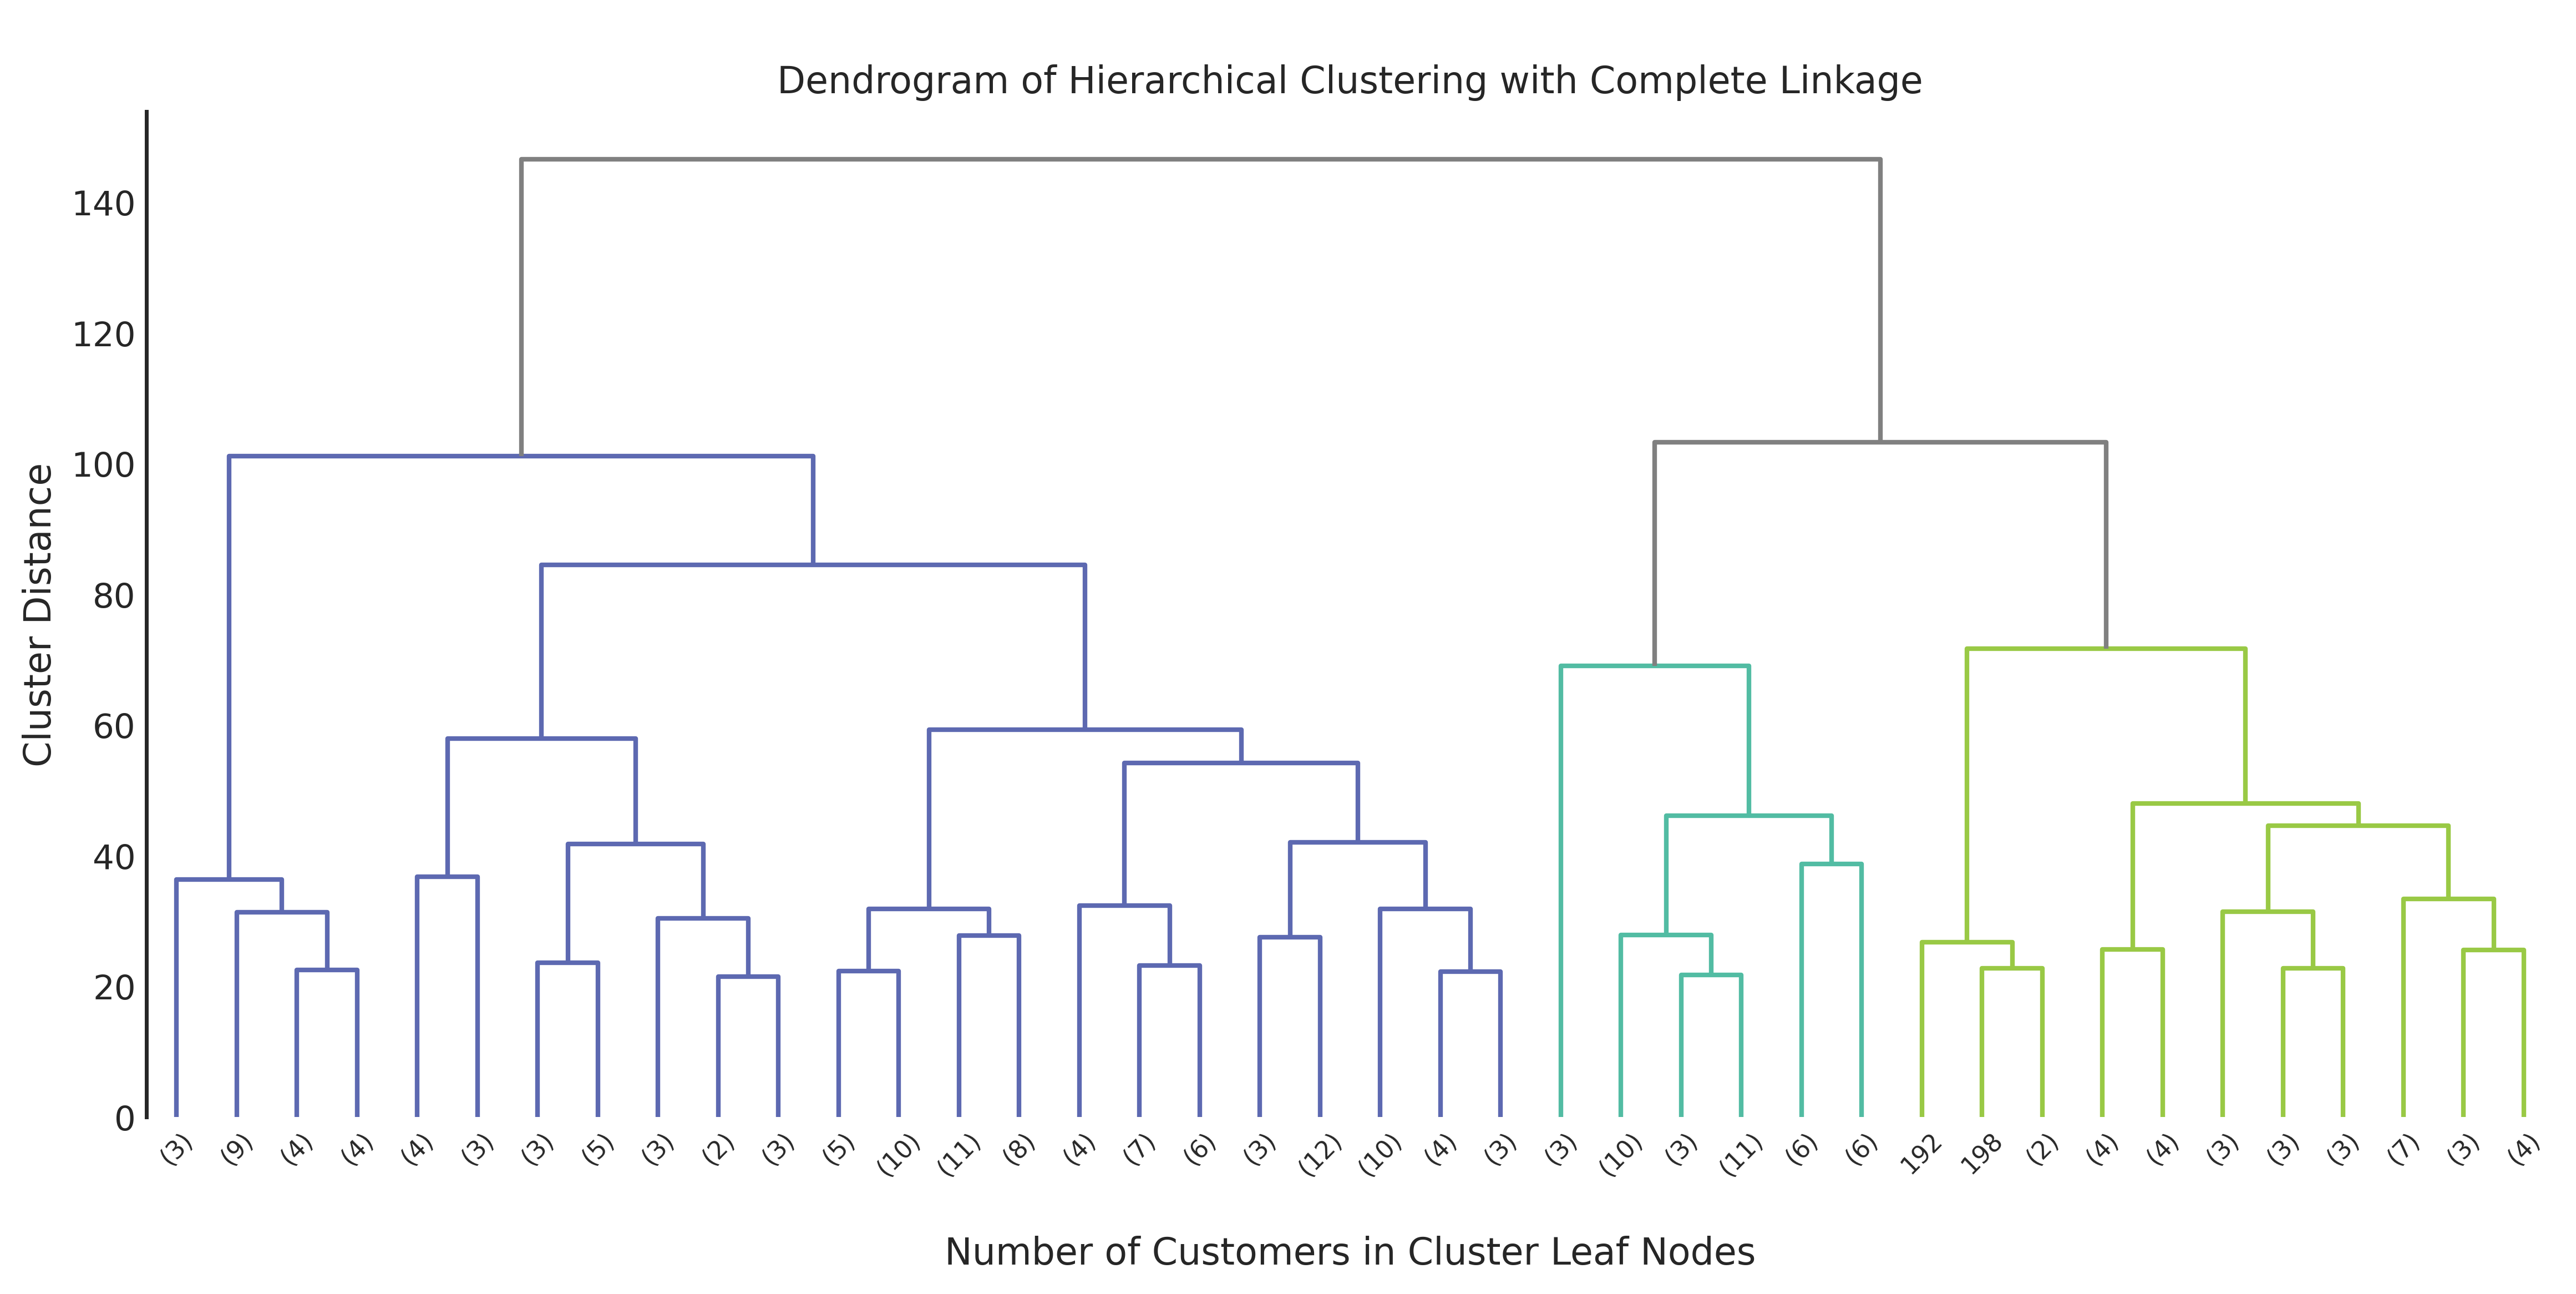

El dendrograma anterior muestra los grupos jerárquicos creados mediante el enlace completo, que une pares de grupos que tienen la distancia máxima más pequeña entre sus observaciones.
<br>La altura a la que se dividen las ramas indica la distancia entre los grupos. 
<br>Los grupos que son más similares entre sí se unen al principio del árbol y se vuelven cada vez menos similares a medida que ascendemos en el árbol. 
<br>Para identificar el número de grupos, podemos hacer un corte horizontal a través del dendrograma.
<br>Por ejemplo, si tuviéramos que cortar el dendrograma a una altura de 100, tendríamos unos tres grupos, con la mayoría de los clientes en el primer grupo, de color púrpura. 

In [ ]:
# Hierarchical clustering
hc = AgglomerativeClustering(3, affinity='euclidean', linkage='complete', compute_full_tree=False)
hc_pred = hc.fit_predict(plot_df1)
plot_hc=plot_df1.copy()
plot_hc["Hierarchical Cluster"]=hc_pred
plot_hc=plot_hc.sort_values(by='Hierarchical Cluster')
plot_hc['Hierarchical Cluster'] = plot_hc['Hierarchical Cluster'].astype(str)

# Plot of clusters                                               
fig = px.scatter(plot_hc, x="clean_Ventas", y="clean_Beneficio_por_pedido", color="Hierarchical Cluster",
                 color_discrete_sequence=px.colors.qualitative.Vivid[1:])
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="Hierarchical Cluster Profiles,<br>Ventas vs. Beneficio por Pedido", 
                  width=700, legend_title = 'Cluster',
                  xaxis=dict(title='Ventas',showline=True, zeroline=False), 
                  yaxis=dict(title='Beneficio por Pedido, $',ticksuffix='k',showline=True))
fig.show()

Detalle del grafico:<br>
En el centro del grafico se encuentra el grupo 2 con los beneficios en rangos de 4 y 6 BK
<br>El grupo 0 en la parte superior con los valores mayores
<br>y el grupo 1 en la parte inferior con los valores menores

# DBSCAN

La técnica de agrupación en clústeres espaciales basada en la densidad de aplicaciones con ruido (DBSCAN). 
<br>DBSCAN segmenta los datos en función de la densidad de las observaciones, donde las áreas de alta densidad se separan de las áreas de baja densidad. 
<br>El modelo también puede identificar clústeres de formas únicas y detectar valores atípicos dentro de los datos, aunque es sensible a las densidades variables de las observaciones.

In [ ]:
# DB Scan clustering
db=DBSCAN(eps=15, min_samples=11, metric='euclidean')  #17,15 14,7 12 7 115
db_preds=db.fit_predict(plot_df1)
plot_db=plot_df1.copy()
plot_db['DB Cluster'] = db_preds
plot_db=plot_db.sort_values(by='DB Cluster')
plot_db['DB Cluster'] = plot_db['DB Cluster'].astype(str).apply(lambda x: 'Outliers' if x == '-1' else x)


# Plot of clusters   
fig = px.scatter(plot_db, x="clean_Ventas", y="clean_Beneficio_por_pedido", color="DB Cluster",
                 color_discrete_sequence=px.colors.qualitative.T10[2:])
fig.update_traces(marker=dict(size=11, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="DBSCAN Cluster Profiles,<br>Ventas vs. Beneficio_por_pedido", 
                  width=700, legend_title = 'Cluster',
                  xaxis=dict(title='Ventas',showline=True, zeroline=False), 
                  yaxis=dict(title='Beneficio_por_pedido, $',ticksuffix='k',showline=True))
fig.show()

Estos segmentos se asemejan a los clústeres del modelo K-Means, con los valores atípicos identificados en rojo.
En general, hay bastantes valores atípicos en el gráfico, lo que probablemente se deba a la variación en las densidades de los clústeres.

# Comparación de perfiles de clúster
A continuación se muestran los gráficos de los perfiles de los clientes en función de ventas y beneficios de cada modelo de agrupación.

In [ ]:
# Initializing figure with 3 3D subplots
fig = make_subplots(rows=3, cols=1,
                    vertical_spacing=0.1,
                    specs=[[{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}], 
                           [{'type': 'scatter3d'}]],
                     subplot_titles=("K-Means Clustering with 5 clusters", 
                                     "Hierarchical Clustering<br>with 3 clusters", 
                                     "DBSCAN<br>with 4 clusters")
                   )

# Adding clusters to scatterplots 
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(int)
plot_km=plot_km.sort_values(by='K-Means Cluster')
for i in range(0,5):
    fig.add_trace(go.Scatter3d(x = plot_km[plot_km['K-Means Cluster'] == i]['clean_Ventas'],
                               y = plot_km[plot_km['K-Means Cluster'] == i]['clean_Beneficio_por_pedido'],
                               z = plot_km[plot_km['K-Means Cluster'] == i]['IDCliente'],                        
                               mode = 'markers', marker=dict(
                                   size=7,  
                                   color = px.colors.qualitative.Prism[i],
                                   line_width = 1,
                                   line_color='#F7F7F7',
                                   opacity=0.7),
                               name = str('Cluster '+str(i)), legendgroup = 1),
                 row=1, col=1)

plot_hc['Hierarchical Cluster'] = plot_hc['Hierarchical Cluster'].astype(int)
plot_hc=plot_hc.sort_values(by='Hierarchical Cluster')
for i in range(0,3):    
    fig.add_trace(go.Scatter3d(x = plot_hc[plot_hc['Hierarchical Cluster'] == i]['clean_Ventas'],
                               y = plot_hc[plot_hc['Hierarchical Cluster'] == i]['clean_Beneficio_por_pedido'],
                               z = plot_hc[plot_hc['Hierarchical Cluster'] == i]['IDCliente'],                        
                               mode = 'markers', marker=dict(
                                   size=7,   
                                   color = px.colors.qualitative.Vivid[i+1],
                                   line_width = 1, 
                                   line_color='#F7F7F7',
                                   opacity=0.7),
                               name = str('Hierarchical Cluster '+str(i)), legendgroup = 2), 
                  row=2, col=1)

for i, j in enumerate(plot_db['DB Cluster'].unique()): 
    fig.add_trace(go.Scatter3d(x = plot_db[plot_db['DB Cluster'] == j]['clean_Ventas'],
                               y = plot_db[plot_db['DB Cluster'] == j]['clean_Beneficio_por_pedido'],
                               z = plot_db[plot_db['DB Cluster'] == j]['IDCliente'], 
                               mode = 'markers', marker=dict(
                                   size=7,   
                                   color = px.colors.qualitative.T10[i+2],
                                   line_width = 1,
                                   line_color='#F7F7F7',
                                   opacity=0.8),
                               name = str('DB Cluster '+str(j)), legendgroup = 3), 
                  row=3, col=1)

fig.update_traces(hovertemplate='Beneficio_por_pedido: %{x}<br>Ventas: $%{z}<br>IDCliente: %{y}')
fig.update_layout(title="Segmento de Clientes segun: Ventas, beneficio por pedido",
                  template=temp, height=1800, legend_tracegroupgap = 500,
                  scene=dict(aspectmode='cube',
                             xaxis = dict(title='Ventas', 
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='$,Beneficio por pedido',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='IDCliente', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")), 
                  scene2=dict(aspectmode='cube', 
                             xaxis = dict(title='Ventas',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='$, Beneficio_por_pedido',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='IDCliente', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")), 
                  scene3=dict(aspectmode='cube', 
                             xaxis = dict(title='Ventas',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='$, Beneficio_por_pedido',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='IDCliente', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"))
                  )
fig.show()


# Conclusion

En este análisis, se desarrollaron tres modelos de agrupamiento para explorar diferentes tipos de clientes: K-Means Clustering, Hierarchical Clustering y DBSCAN. 
<br>Cada modelo identificó distintos segmentos de clientes....... 
<br>De las tres técnicas de agrupación,
<br>el modelo K-Means ...falta
<br> DBSCAN creó un modelo más simple con solo x clústeres e identificó los valores atípicos dentro de los datos. 

<br>El modelo de agrupación jerárquica definió el menor número de clústeres en general, con más énfasis en los ingresos del cliente.



A partir de este analisis, se podrian ejecutar acciones a fines de favorecer los segmentos de clientes que demuestren inconvenientes,,,,,,,,,,,,


